<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Choose-top" data-toc-modified-id="Choose-top-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Choose top</a></span></li><li><span><a href="#Total-Reviews-by-Company" data-toc-modified-id="Total-Reviews-by-Company-0.0.2"><span class="toc-item-num">0.0.2&nbsp;&nbsp;</span>Total Reviews by Company</a></span></li></ul></li><li><span><a href="#Percentage" data-toc-modified-id="Percentage-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Percentage</a></span></li><li><span><a href="#Specifications-data-extraction-and-Merging-start-with-review-data" data-toc-modified-id="Specifications-data-extraction-and-Merging-start-with-review-data-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Specifications data extraction and Merging start with review data</a></span></li></ul></li><li><span><a href="#Merge-data-using-text-matching-package" data-toc-modified-id="Merge-data-using-text-matching-package-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Merge data using text matching package</a></span></li></ul></div>

In [1]:
import os
import re, string, unicodedata
from datetime import datetime
from dateutil import parser
import seaborn as sns
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt


from bs4 import BeautifulSoup, NavigableString, Comment


In [2]:
data = pd.read_csv('productreviews_all-back1.csv', index_col=0, parse_dates=['Date']) #decimal=-","

# cols=data.next().strip().split(',')
# no_cols=len(data.next().strip().split(','))


In [3]:
data.shape


(2166, 9)

In [4]:
df = data.copy()


# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', 50)

In [5]:
df.dropna()

df.columns = df.columns.str.lower()

df.head()

price   company                                             model  \
ID                                                                         
3   $409.99   gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
4   $409.99   gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
5   $409.99   gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
6   $409.99   gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
7   $409.99   gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   

                                 review_title           rating       date  \
ID                                                                          
3                                 Great Value  rating rating-4 2020-05-09   
4                                  DO NOT BUY  rating rating-1 2020-05-08   
5   Runs great for me, but not out of the box  rating rating-1 2020-05-07   
6                       Getting Black Screens  rating rating-1 2020-05-07   
7                       Died after 10 minutes  rating rating-1 2020-05-06   

              time                                             review  \
ID                                                                      
3    5/9/2020 8:36  Pros: Amazing Performance for the price it's o...   
4   5/8/2020 12:19  Pros: -Nothing\n\nCons: -Does not work.\n-Cras...   
5   5/7/2020 18:03  Pros: Great for 1080p on high+ settings\nGood ...   
6   5/7/2020 13:23  Pros: Hardware is nice and powerful.\nHigh lev...   
7   5/6/2020 18:14  Overall Review: it died after 10 minutes of st...   

      customer  
ID              
3   Matthew M.  
4     Larry I.  
5   Matthew m.  
6     Clint M.  
7      Tara O.

In [6]:
df.reset_index()

ID     price   company  \
0        3  $409.99   gigabyte   
1        4  $409.99   gigabyte   
2        5  $409.99   gigabyte   
3        6  $409.99   gigabyte   
4        7  $409.99   gigabyte   
...    ...       ...       ...   
2161  2281       419  gigabyte   
2162  2282       419  gigabyte   
2163  2283       419  gigabyte   
2164  2284       419  gigabyte   
2165  2285       419  gigabyte   

                                                  model  \
0      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
1      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
2      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
3      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
4      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
...                                                 ...   
2161  gigabyte geforce rtx 2060 super gv n206sgaming...   
2162  gigabyte geforce rtx 2060 super gv n206sgaming...   
2163  gigabyte geforce rtx 2060 super gv n206sgaming...   
2164  gigabyte geforce rtx 2060 super gv n206sgaming...   
2165  gigabyte geforce rtx 2060 super gv n206sgaming...   

                                           review_title           rating  \
0                                           Great Value  rating rating-4   
1                                            DO NOT BUY  rating rating-1   
2             Runs great for me, but not out of the box  rating rating-1   
3                                 Getting Black Screens  rating rating-1   
4                                 Died after 10 minutes  rating rating-1   
...                                                 ...              ...   
2161               2060 super GPU with 2070 performance  rating rating-5   
2162                                             Quiet!  rating rating-5   
2163  One of the best options when doing an all whit...  rating rating-5   
2164                        Amazing 1440p graphics card  rating rating-5   
2165                                Worked for 3 hours.  rating rating-1   

           date             time  \
0    2020-05-09    5/9/2020 8:36   
1    2020-05-08   5/8/2020 12:19   
2    2020-05-07   5/7/2020 18:03   
3    2020-05-07   5/7/2020 13:23   
4    2020-05-06   5/6/2020 18:14   
...         ...              ...   
2161 2020-04-21  4/21/2020 15:41   
2162 2020-04-19  4/19/2020 15:05   
2163 2020-03-19   3/19/2020 8:23   
2164 2020-03-18   3/18/2020 8:38   
2165 2020-03-09   3/9/2020 23:01   

                                                 review        customer  
0     Pros: Amazing Performance for the price it's o...      Matthew M.  
1     Pros: -Nothing\n\nCons: -Does not work.\n-Cras...        Larry I.  
2     Pros: Great for 1080p on high+ settings\nGood ...      Matthew m.  
3     Pros: Hardware is nice and powerful.\nHigh lev...        Clint M.  
4     Overall Review: it died after 10 minutes of st...         Tara O.  
...                                                 ...             ...  
2161  Pros: Looks good in my white build, and perfor...       Jeremy N.  
2162  Pros: This card makes less noise than my old G...        Danny c.  
2163  Pros: Great pricing considering your options a...         Rich m.  
2164  Overall Review: My experience with this card i...  CHRISTOPHER D.  
2165  Pros: The first three hours that I had this ca...     Nicholas B.  

[2166 rows x 10 columns]

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.head().T

ID                                                            3  \
price                                                  $409.99    
company                                                gigabyte   
model          gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
review_title                                        Great Value   
rating                                          rating rating-4   
date                                        2020-05-09 00:00:00   
time                                              5/9/2020 8:36   
review        Pros: Amazing Performance for the price it's o...   
customer                                             Matthew M.   

ID                                                            4  \
price                                                  $409.99    
company                                                gigabyte   
model          gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
review_title                                         DO NOT BUY   
rating                                          rating rating-1   
date                                        2020-05-08 00:00:00   
time                                             5/8/2020 12:19   
review        Pros: -Nothing\n\nCons: -Does not work.\n-Cras...   
customer                                               Larry I.   

ID                                                            5  \
price                                                  $409.99    
company                                                gigabyte   
model          gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
review_title          Runs great for me, but not out of the box   
rating                                          rating rating-1   
date                                        2020-05-07 00:00:00   
time                                             5/7/2020 18:03   
review        Pros: Great for 1080p on high+ settings\nGood ...   
customer                                             Matthew m.   

ID                                                            6  \
price                                                  $409.99    
company                                                gigabyte   
model          gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
review_title                              Getting Black Screens   
rating                                          rating rating-1   
date                                        2020-05-07 00:00:00   
time                                             5/7/2020 13:23   
review        Pros: Hardware is nice and powerful.\nHigh lev...   
customer                                               Clint M.   

ID                                                            7  
price                                                  $409.99   
company                                                gigabyte  
model          gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd  
review_title                              Died after 10 minutes  
rating                                          rating rating-1  
date                                        2020-05-06 00:00:00  
time                                             5/6/2020 18:14  
review        Overall Review: it died after 10 minutes of st...  
customer                                                Tara O.

In [9]:
msk1 = df['company'] == 'asus'
df[msk1]

price company                                              model  \
ID                                                                             
173      $459.99     asus  asus radeon rx 5700 xt rog strix rx5700xt o8g ...   
174      $459.99     asus  asus radeon rx 5700 xt rog strix rx5700xt o8g ...   
175      $459.99     asus  asus radeon rx 5700 xt rog strix rx5700xt o8g ...   
176      $459.99     asus  asus radeon rx 5700 xt rog strix rx5700xt o8g ...   
177      $459.99     asus  asus radeon rx 5700 xt rog strix rx5700xt o8g ...   
...           ...     ...                                                ...   
2234  $13,399.99     asus   asus geforce rtx 2060 super dual rtx2060s 8g evo   
2236          389    asus  asus geforce rtx 2060 rog strix rtx2060 a6g ga...   
2250          524    asus   asus geforce rtx 2070 super dual rtx2070s a8g ev   
2251          524    asus   asus geforce rtx 2070 super dual rtx2070s a8g ev   
2252          524    asus   asus geforce rtx 2070 super dual rtx2070s a8g ev   

                                           review_title           rating  \
ID                                                                         
173   big a bear to install but i like it also cant ...  rating rating-4   
174   Terrible performance - Freezing, stuttering, a...  rating rating-1   
175   If you're going to buy a 5700xt, buy it from s...  rating rating-1   
176                                 worthless the price  rating rating-2   
177                     Best RX 5700XT but a little hot  rating rating-5   
...                                                 ...              ...   
2234                                          Great GPU  rating rating-5   
2236                                         So awesome  rating rating-5   
2250                                      Great product  rating rating-5   
2251                           Cool, Quiet and Powerful  rating rating-5   
2252                            Outstanding performance  rating rating-5   

           date              time  \
ID                                  
173  2020-05-07    5/7/2020 17:42   
174  2020-05-05    5/5/2020 16:02   
175  2020-05-03     5/3/2020 3:03   
176  2020-05-01     5/1/2020 8:18   
177  2020-04-28   4/28/2020 12:10   
...         ...               ...   
2234 2019-09-21   9/21/2019 22:02   
2236 2019-10-26  10/26/2019 19:44   
2250 2020-04-28   4/28/2020 13:33   
2251 2020-04-17   4/17/2020 17:17   
2252 2020-04-16   4/16/2020 17:48   

                                                 review    customer  
ID                                                                   
173   Overall Review: wish i knew were to find this ...    jerol l.  
174   Pros: When it works it does well\n\nCons: Game...     Adam C.  
175   Overall Review: This card ran at 1600hz/105 de...  Michael A.  
176   Pros: i just liked the box and the huge gpu !\...  Mohamed D.  
177   Pros: Best RX5700 XT performance wise. It does...    Ethan W.  
...                                                 ...         ...  
2234  Overall Review: Great card, runs very cool, qu...    Chris H.  
2236  Pros: Makes everything looks so good runs perf...    Jacey M.  
2250  Pros: Good cooling\nThe card is silent whateve...  Gabriel T.  
2251  Pros: Stays cool and quiet with its big heatsi...    Tyler B.  
2252  Pros: -Built like a battleship (feels nearly e...  PATRICK H.  

[168 rows x 9 columns]

In [10]:
df1 = df.copy()
# df2 = df.copy

df1.tail()

price   company                                              model  \
ID                                                                        
2281   419  gigabyte  gigabyte geforce rtx 2060 super gv n206sgaming...   
2282   419  gigabyte  gigabyte geforce rtx 2060 super gv n206sgaming...   
2283   419  gigabyte  gigabyte geforce rtx 2060 super gv n206sgaming...   
2284   419  gigabyte  gigabyte geforce rtx 2060 super gv n206sgaming...   
2285   419  gigabyte  gigabyte geforce rtx 2060 super gv n206sgaming...   

                                           review_title           rating  \
ID                                                                         
2281               2060 super GPU with 2070 performance  rating rating-5   
2282                                             Quiet!  rating rating-5   
2283  One of the best options when doing an all whit...  rating rating-5   
2284                        Amazing 1440p graphics card  rating rating-5   
2285                                Worked for 3 hours.  rating rating-1   

           date             time  \
ID                                 
2281 2020-04-21  4/21/2020 15:41   
2282 2020-04-19  4/19/2020 15:05   
2283 2020-03-19   3/19/2020 8:23   
2284 2020-03-18   3/18/2020 8:38   
2285 2020-03-09   3/9/2020 23:01   

                                                 review        customer  
ID                                                                       
2281  Pros: Looks good in my white build, and perfor...       Jeremy N.  
2282  Pros: This card makes less noise than my old G...        Danny c.  
2283  Pros: Great pricing considering your options a...         Rich m.  
2284  Overall Review: My experience with this card i...  CHRISTOPHER D.  
2285  Pros: The first three hours that I had this ca...     Nicholas B.

In [11]:
df2 = df1.copy()

In [12]:
df2['price'] = df1.price.str.replace('[$,]', '').astype('float')
df2['price']

ID
3       409.99
4       409.99
5       409.99
6       409.99
7       409.99
         ...  
2281    419.00
2282    419.00
2283    419.00
2284    419.00
2285    419.00
Name: price, Length: 2166, dtype: float64

In [13]:
df2['rating'] =df1['rating'].apply(lambda x: int(x[-1]))
df2['rating'].value_counts()

5    1261
1     325
4     281
3     159
2     140
Name: rating, dtype: int64

In [14]:
df2.rating.head() 

ID
3    4
4    1
5    1
6    1
7    1
Name: rating, dtype: int64

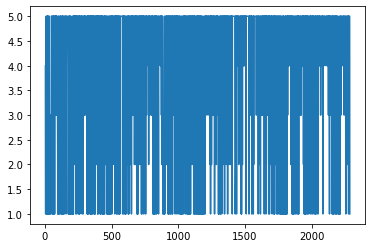

In [15]:
plt.plot(df2.rating)

In [16]:
df2 = df2.astype({'rating' : 'int32','price' : 'float'})
df2.head()

price   company                                             model  \
ID                                                                       
3   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
4   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
5   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
6   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
7   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   

                                 review_title  rating       date  \
ID                                                                 
3                                 Great Value       4 2020-05-09   
4                                  DO NOT BUY       1 2020-05-08   
5   Runs great for me, but not out of the box       1 2020-05-07   
6                       Getting Black Screens       1 2020-05-07   
7                       Died after 10 minutes       1 2020-05-06   

              time                                             review  \
ID                                                                      
3    5/9/2020 8:36  Pros: Amazing Performance for the price it's o...   
4   5/8/2020 12:19  Pros: -Nothing\n\nCons: -Does not work.\n-Cras...   
5   5/7/2020 18:03  Pros: Great for 1080p on high+ settings\nGood ...   
6   5/7/2020 13:23  Pros: Hardware is nice and powerful.\nHigh lev...   
7   5/6/2020 18:14  Overall Review: it died after 10 minutes of st...   

      customer  
ID              
3   Matthew M.  
4     Larry I.  
5   Matthew m.  
6     Clint M.  
7      Tara O.

In [17]:
df2['datetime_clean'] = pd.to_datetime(df2.time)

In [18]:
df2.datetime_clean.head()

ID
3   2020-05-09 08:36:00
4   2020-05-08 12:19:00
5   2020-05-07 18:03:00
6   2020-05-07 13:23:00
7   2020-05-06 18:14:00
Name: datetime_clean, dtype: datetime64[ns]

In [19]:
df2['year'] = df2.datetime_clean.dt.year

In [20]:
df2['year']

ID
3       2020
4       2020
5       2020
6       2020
7       2020
        ... 
2281    2020
2282    2020
2283    2020
2284    2020
2285    2020
Name: year, Length: 2166, dtype: int64

In [22]:
df2['month'] = df2.datetime_clean.dt.month

In [23]:
df2['price'].max()

13399.99

In [1028]:
df2.month.head()

ID
3    5
4    5
5    5
6    5
7    5
Name: month, dtype: int64

In [1029]:
df2.review = df2.review.str.replace('\n'," ")

In [1030]:
# df2['pros']

a = df2.review.iloc[0]
a[0:a.find('Cons:')]
df2['pros'] = df2.review.apply(lambda x:  x[x.find('Pros:'):x.find('Cons:')])
df2 .pros.head()


#if (x.find('Pros:')!= 0) else 
# [x.find('Pros'):x.find('Cons:')]

ID
3    Pros: Amazing Performance for the price it's o...
4                                     Pros: -Nothing  
5    Pros: Great for 1080p on high+ settings Good f...
6    Pros: Hardware is nice and powerful. High leve...
7                                                     
Name: pros, dtype: object

In [1031]:
df2['cons'] = df2.review.apply(lambda x:  x[x.find('Cons:'):x.find('Overall Review:')])


In [1032]:
df2.cons.head()

ID
3    Cons: The card does get very warm so any large...
4    Cons: -Does not work. -Crashes with any driver...
5    Cons: Crashed often with out of the box settin...
6    Cons: -Drivers need serious work -Several Blac...
7                                                     
Name: cons, dtype: object

In [1033]:
df2['overall'] = df2.review.apply(lambda x:  x[x.find('Overall Review:'):])


In [1034]:
df2.review.head()

ID
3    Pros: Amazing Performance for the price it's o...
4    Pros: -Nothing  Cons: -Does not work. -Crashes...
5    Pros: Great for 1080p on high+ settings Good f...
6    Pros: Hardware is nice and powerful. High leve...
7    Overall Review: it died after 10 minutes of st...
Name: review, dtype: object

In [1035]:
df2['rating'] =df1['rating'].str.extract(r'(\d)')
df2['rating'].value_counts()

5    1261
1     325
4     281
3     159
2     140
Name: rating, dtype: int64

In [1036]:
df2['model'].iloc[200]

'asus radeon rx 5700 xt rog strix rx5700xt o8g gaming'

In [1037]:
df2 = df2.astype({'rating' : 'int32','price' : 'float'})
df2.head()

price   company                                             model  \
ID                                                                       
3   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
4   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
5   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
6   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
7   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   

                                 review_title  rating       date  \
ID                                                                 
3                                 Great Value       4 2020-05-09   
4                                  DO NOT BUY       1 2020-05-08   
5   Runs great for me, but not out of the box       1 2020-05-07   
6                       Getting Black Screens       1 2020-05-07   
7                       Died after 10 minutes       1 2020-05-06   

              time                                             review  \
ID                                                                      
3    5/9/2020 8:36  Pros: Amazing Performance for the price it's o...   
4   5/8/2020 12:19  Pros: -Nothing  Cons: -Does not work. -Crashes...   
5   5/7/2020 18:03  Pros: Great for 1080p on high+ settings Good f...   
6   5/7/2020 13:23  Pros: Hardware is nice and powerful. High leve...   
7   5/6/2020 18:14  Overall Review: it died after 10 minutes of st...   

      customer      datetime_clean  year  month  \
ID                                                
3   Matthew M. 2020-05-09 08:36:00  2020      5   
4     Larry I. 2020-05-08 12:19:00  2020      5   
5   Matthew m. 2020-05-07 18:03:00  2020      5   
6     Clint M. 2020-05-07 13:23:00  2020      5   
7      Tara O. 2020-05-06 18:14:00  2020      5   

                                                 pros  \
ID                                                      
3   Pros: Amazing Performance for the price it's o...   
4                                    Pros: -Nothing     
5   Pros: Great for 1080p on high+ settings Good f...   
6   Pros: Hardware is nice and powerful. High leve...   
7                                                       

                                                 cons  \
ID                                                      
3   Cons: The card does get very warm so any large...   
4   Cons: -Does not work. -Crashes with any driver...   
5   Cons: Crashed often with out of the box settin...   
6   Cons: -Drivers need serious work -Several Blac...   
7                                                       

                                              overall  
ID                                                     
3   Overall Review: Great Value, amazing performan...  
4   Overall Review: I purchased this card for a fu...  
5   Overall Review: I would recommend for anyone c...  
6   Overall Review: Updated Drivers and factory re...  
7   Overall Review: it died after 10 minutes of st...

In [1038]:
df2.tail()

price   company                                              model  \
ID                                                                         
2281  419.0  gigabyte  gigabyte geforce rtx 2060 super gv n206sgaming...   
2282  419.0  gigabyte  gigabyte geforce rtx 2060 super gv n206sgaming...   
2283  419.0  gigabyte  gigabyte geforce rtx 2060 super gv n206sgaming...   
2284  419.0  gigabyte  gigabyte geforce rtx 2060 super gv n206sgaming...   
2285  419.0  gigabyte  gigabyte geforce rtx 2060 super gv n206sgaming...   

                                           review_title  rating       date  \
ID                                                                           
2281               2060 super GPU with 2070 performance       5 2020-04-21   
2282                                             Quiet!       5 2020-04-19   
2283  One of the best options when doing an all whit...       5 2020-03-19   
2284                        Amazing 1440p graphics card       5 2020-03-18   
2285                                Worked for 3 hours.       1 2020-03-09   

                 time                                             review  \
ID                                                                         
2281  4/21/2020 15:41  Pros: Looks good in my white build, and perfor...   
2282  4/19/2020 15:05  Pros: This card makes less noise than my old G...   
2283   3/19/2020 8:23  Pros: Great pricing considering your options a...   
2284   3/18/2020 8:38  Overall Review: My experience with this card i...   
2285   3/9/2020 23:01  Pros: The first three hours that I had this ca...   

            customer      datetime_clean  year  month  \
ID                                                      
2281       Jeremy N. 2020-04-21 15:41:00  2020      4   
2282        Danny c. 2020-04-19 15:05:00  2020      4   
2283         Rich m. 2020-03-19 08:23:00  2020      3   
2284  CHRISTOPHER D. 2020-03-18 08:38:00  2020      3   
2285     Nicholas B. 2020-03-09 23:01:00  2020      3   

                                                   pros  \
ID                                                        
2281  Pros: Looks good in my white build, and perfor...   
2282  Pros: This card makes less noise than my old G...   
2283  Pros: Great pricing considering your options a...   
2284                                                      
2285  Pros: The first three hours that I had this ca...   

                                                   cons  \
ID                                                        
2281                                       Cons: none     
2282                                                      
2283                       Cons: None at this moment.     
2284                                                      
2285  Cons: After three hours, my computer seemed to...   

                                                overall  
ID                                                       
2281  Overall Review: I would recommend and purchase...  
2282  Overall Review: Great price point, 8gb video m...  
2283  Overall Review: Would highly recommend this ca...  
2284  Overall Review: My experience with this card i...  
2285  Overall Review: I have not dealt with my retur...

In [1039]:
df2['datetime'] = pd.to_datetime(df2.time)
df2.review = df2.review.str.replace('\W'," ")
df2.review = df2.review.str.replace('Pros'," ")
df2.review = df2.review.str.replace('Cons'," ")
df2.review = df2.review.str.replace('Overall Review'," ")

In [1040]:
df3 = df2.copy()

In [1041]:
df3['rtitle'] = df3.review_title.str.findall('\w+')

In [1042]:
df3.rtitle

ID
3                                          [Great, Value]
4                                          [DO, NOT, BUY]
5       [Runs, great, for, me, but, not, out, of, the,...
6                               [Getting, Black, Screens]
7                              [Died, after, 10, minutes]
                              ...                        
2281          [2060, super, GPU, with, 2070, performance]
2282                                              [Quiet]
2283    [One, of, the, best, options, when, doing, an,...
2284                     [Amazing, 1440p, graphics, card]
2285                              [Worked, for, 3, hours]
Name: rtitle, Length: 2166, dtype: object

In [1043]:
df3['rview'] = df3['review'].str.split('Cons:')

In [1044]:
df3['rview']

ID
3       [   Amazing Performance for the price it s off...
4       [    Nothing      Does not work   Crashes with...
5       [   Great for 1080p on high  settings Good fre...
6       [   Hardware is nice and powerful  High level ...
7       [   it died after 10 minutes of stress testing...
                              ...                        
2281    [   Looks good in my white build  and performs...
2282    [   This card makes less noise than my old GTX...
2283    [   Great pricing considering your options are...
2284    [   My experience with this card is  it s an a...
2285    [   The first three hours that I had this card...
Name: rview, Length: 2166, dtype: object

In [1045]:
df3 = df2.copy()
df2.review.head()

ID
3       Amazing Performance for the price it s offe...
4        Nothing      Does not work   Crashes with ...
5       Great for 1080p on high  settings Good free...
6       Hardware is nice and powerful  High level p...
7       it died after 10 minutes of stress testing ...
Name: review, dtype: object

In [1046]:
df2.head()

price   company                                             model  \
ID                                                                       
3   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
4   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
5   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
6   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
7   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   

                                 review_title  rating       date  \
ID                                                                 
3                                 Great Value       4 2020-05-09   
4                                  DO NOT BUY       1 2020-05-08   
5   Runs great for me, but not out of the box       1 2020-05-07   
6                       Getting Black Screens       1 2020-05-07   
7                       Died after 10 minutes       1 2020-05-06   

              time                                             review  \
ID                                                                      
3    5/9/2020 8:36     Amazing Performance for the price it s offe...   
4   5/8/2020 12:19      Nothing      Does not work   Crashes with ...   
5   5/7/2020 18:03     Great for 1080p on high  settings Good free...   
6   5/7/2020 13:23     Hardware is nice and powerful  High level p...   
7   5/6/2020 18:14     it died after 10 minutes of stress testing ...   

      customer      datetime_clean  year  month  \
ID                                                
3   Matthew M. 2020-05-09 08:36:00  2020      5   
4     Larry I. 2020-05-08 12:19:00  2020      5   
5   Matthew m. 2020-05-07 18:03:00  2020      5   
6     Clint M. 2020-05-07 13:23:00  2020      5   
7      Tara O. 2020-05-06 18:14:00  2020      5   

                                                 pros  \
ID                                                      
3   Pros: Amazing Performance for the price it's o...   
4                                    Pros: -Nothing     
5   Pros: Great for 1080p on high+ settings Good f...   
6   Pros: Hardware is nice and powerful. High leve...   
7                                                       

                                                 cons  \
ID                                                      
3   Cons: The card does get very warm so any large...   
4   Cons: -Does not work. -Crashes with any driver...   
5   Cons: Crashed often with out of the box settin...   
6   Cons: -Drivers need serious work -Several Blac...   
7                                                       

                                              overall            datetime  
ID                                                                         
3   Overall Review: Great Value, amazing performan... 2020-05-09 08:36:00  
4   Overall Review: I purchased this card for a fu... 2020-05-08 12:19:00  
5   Overall Review: I would recommend for anyone c... 2020-05-07 18:03:00  
6   Overall Review: Updated Drivers and factory re... 2020-05-07 13:23:00  
7   Overall Review: it died after 10 minutes of st... 2020-05-06 18:14:00

In [1047]:
df3['review'] = df3['review_title'] + ' ' + df3['review']


In [1048]:
# Convert all the string to lower cases
df3['review'] =df3['review'].str.lower()
# \S+ means anything that is not an empty space
# df3['review'] = df3['review'].apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
df3['review'] = df3['review'].apply(lambda x: re.sub('\s+', ' ', x))

In [1049]:
df3.review.head()

ID
3    great value amazing performance for the price ...
4    do not buy nothing does not work crashes with ...
5    runs great for me, but not out of the box grea...
6    getting black screens hardware is nice and pow...
7    died after 10 minutes it died after 10 minutes...
Name: review, dtype: object

In [1050]:
df3.head()


price   company                                             model  \
ID                                                                       
3   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
4   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
5   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
6   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
7   409.99  gigabyte  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   

                                 review_title  rating       date  \
ID                                                                 
3                                 Great Value       4 2020-05-09   
4                                  DO NOT BUY       1 2020-05-08   
5   Runs great for me, but not out of the box       1 2020-05-07   
6                       Getting Black Screens       1 2020-05-07   
7                       Died after 10 minutes       1 2020-05-06   

              time                                             review  \
ID                                                                      
3    5/9/2020 8:36  great value amazing performance for the price ...   
4   5/8/2020 12:19  do not buy nothing does not work crashes with ...   
5   5/7/2020 18:03  runs great for me, but not out of the box grea...   
6   5/7/2020 13:23  getting black screens hardware is nice and pow...   
7   5/6/2020 18:14  died after 10 minutes it died after 10 minutes...   

      customer      datetime_clean  year  month  \
ID                                                
3   Matthew M. 2020-05-09 08:36:00  2020      5   
4     Larry I. 2020-05-08 12:19:00  2020      5   
5   Matthew m. 2020-05-07 18:03:00  2020      5   
6     Clint M. 2020-05-07 13:23:00  2020      5   
7      Tara O. 2020-05-06 18:14:00  2020      5   

                                                 pros  \
ID                                                      
3   Pros: Amazing Performance for the price it's o...   
4                                    Pros: -Nothing     
5   Pros: Great for 1080p on high+ settings Good f...   
6   Pros: Hardware is nice and powerful. High leve...   
7                                                       

                                                 cons  \
ID                                                      
3   Cons: The card does get very warm so any large...   
4   Cons: -Does not work. -Crashes with any driver...   
5   Cons: Crashed often with out of the box settin...   
6   Cons: -Drivers need serious work -Several Blac...   
7                                                       

                                              overall            datetime  
ID                                                                         
3   Overall Review: Great Value, amazing performan... 2020-05-09 08:36:00  
4   Overall Review: I purchased this card for a fu... 2020-05-08 12:19:00  
5   Overall Review: I would recommend for anyone c... 2020-05-07 18:03:00  
6   Overall Review: Updated Drivers and factory re... 2020-05-07 13:23:00  
7   Overall Review: it died after 10 minutes of st... 2020-05-06 18:14:00

In [1051]:
# Checkpoint
df3.to_csv('df3_saved.csv')

In [297]:
spike_cols = [col for col in df3.model if x in col]
x = 'ROG-STRIX-RTX2080TI-O11G-GAMING'

In [301]:
df4 = df3.copy()

In [42]:
df3.year.value_counts()


2019    1045
2020     646
2018     324
2017     131
2016      20
Name: year, dtype: int64

In [43]:
df3.company.value_counts()

evga          620
msi           401
gigabyte      345
sapphire      263
asus          168
xfx           124
asrock        110
powercolor     94
zotac          40
pny             1
Name: company, dtype: int64

In [50]:
bar_values = df3.company.value_counts()

In [51]:
names = ['gigabyte', 'evga', 'asrock', 'asus', 'sapphire', 'msi',
       'powercolor', 'zotac', 'xfx']

### Choose top
evga         620
msi           401
gigabyte      345
sapphire      263
asus          168
xfx           124
asrock        110

### Total Reviews by Company

In [ ]:
# fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

ax = bar_values.plot(kind='bar')
# plot.xticks()
# %matplotlib inline
plt.xticks(rotation=90)
plt.title('My title')
plt.xlabel('categories')
plt.ylabel('values')
add_value_labels(ax)


In [ ]:
import seaborn as sns
sns.set()

In [ ]:
plt.style.use('ggplot')

x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
energy = [5, 6, 15, 22, 24, 8]

x_pos = [i for i, _ in enumerate(x)]
x_pos
plt.bar(x_pos, energy, color='green')
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

plt.show()

In [ ]:
x_pos

## Percentage

In [ ]:
review_percent_count = df3.company.value_counts(normalize=True).round(4) * 100

In [ ]:
review_percent_count

In [ ]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], label='Men')

ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.legend(loc="upper right")

plt.show()

In [ ]:
evga = df3['company'] == 'evga'
ratings = df3['rating'] == 5
df3[evga][['model','year','rating']].groupby('model')

In [ ]:
avg_company_year = df3.groupby(['company', 'year']).agg({'rating': 'mean'})

In [ ]:
avg_company_year = df3.groupby(['company', 'year'])

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:

# df3.columns.tolist()
avg_company_year

In [ ]:
avg_company_year = df3.groupby(['company', 'year']).agg({'rating': 'mean'})

In [ ]:
avg_company_year = df3.groupby(['company', 'year','month']).agg({'rating': 'mean'})

In [ ]:
companies = df3['company'].unique()
companies

In [ ]:
['gigabyte', 'evga', 'asrock', 'asus', 'sapphire', 'msi',
       'powercolor', 'zotac', 'xfx']

In [ ]:
# rating_mask = df3['rating']
ratingsc = df3[(df3['company'].isin(company_list))].groupby('company')['rating']

In [ ]:
ratingsc.mean()



In [ ]:

#df.groupby('country')['imdb_score'].median().sort_values(ascending=False).plot.bar(color='b')
company_rating = df3[['company','rating']].groupby('company')

In [ ]:
dm = df3['model']
dm.unique()
len(dm.unique())
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
# df.plot.bar(color=color, ax= ax3, title='Bar plot')

#fig.savefig('c13-pdemo-scat.png')


In [ ]:
sns.boxplot(x='company', y='rating',data=df3[['company','rating']])

In [ ]:
plt(figize=(20,20))
sns.boxplot(x='company', y='price',data=df3[['company','price']], showfliers=False)

In [ ]:
import matplotlib.style as style
data1 = company_rating.mean().sort_values(ascending=False, by='rating')

# ax = sns.barplot(y= "rating", x = "company", data = data1, palette=("Blues_d"))
# sns.set_context("poster")

In [ ]:
# df3['review'] = df3['review'].apply(lambda x: re.sub('[^\w\s]', '', x))
ratinggroup = df3.rating.groupby(comp_mask)
ratinggroup

In [ ]:
plt.hist(df3['rating'], bins=5, color="#5ee3ff")

In [ ]:
# langs = ["English" ,"French", "Mandarin"]
# df.loc[(df["language"].isin(langs)) & (df["imdb_score"]>7)]

In [ ]:


# The function above... In my case it's in a local utilities module
# from sci_utilities import is_outlier

# Generate some data
x = np.random.random(100)

# Append a few "bad" points
x = np.r_[x, -3, -10, 100]

# Keep only the "good" points
# "~" operates as a logical not operator on boolean numpy arrays
filtered = x[~is_outlier(x)]

# Plot the results
fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.hist(x)
ax1.set_title('Original')

ax2.hist(filtered)
ax2.set_title('Without Outliers')

plt.show()

In [ ]:
from nltk.corpus import stopwords

# assign stopwords in english to variable "stop"
stop = stopwords.words('english')
print(stop)

In [ ]:
#removes all stop words
df3['tokens'] = df3['review'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))

In [ ]:
df3.head()

In [ ]:
df3.review.iloc[1]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns   


In [ ]:
evga1 = df3['company'] == 'evga'
evgatokens = df3[evga]['tokens']
evgareview = df3[evga]['review']

In [ ]:
evgareview

In [ ]:
from collections import Counter

def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [ ]:
top_20_positive_review_words=getMostCommon(evgatokens,20)
top_20_positive_review_words


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

wordlist = evgareview

txt=''
for index, rows in evgareview.iterrows():
    txt = ''.join(rows.review)
txt
# introduction_doc = nlp(wordlist)

In [ ]:
introduction_doc = nlp(txt)
print ([token.text for token in introduction_doc])

In [ ]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
len(spacy_stopwords)
about_no_stopword_doc = [token for token in txt if not token.is_stop]


In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df3['tokens'].tolist()))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

In [ ]:
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)


In [ ]:
group_rating_mean = df3['rating'].groupby(df3['company']).mean()

In [ ]:
group_rating_mean

## Specifications data extraction and Merging start with review data
* Utilize product_websites.txt that contains product specifications html

In [56]:
#product, prices, specs
f1 = open('product_websites.txt', 'r')
# soupy = f.read()
filetext = f1


In [57]:
cs = BeautifulSoup(f1,'lxml')


In [58]:
# # soupy = f.read()
# filetext = f1
spec2 = cs.find_all(['dd','dt'])

specval2= cs.find_all('dd')
sv = cs.find_all('dt')
link = cs.find_all(attrs={"class":"specs-popup"})

In [59]:
spec3 = cs.find_all(['dd','dt'],attrs={"class":"specs-popup"})


In [312]:
count = 1
for i in sv:
    print('count ', count, i.text)
    count +=1

count  1 \n               Brand\n              
count  2 \n               Series\n              
count  3 \n               Model\n              
count  4 \n               \n                Interface\n               \n              
count  5 \n               Chipset Manufacturer\n              
count  6 \n               GPU Series\n              
count  7 \n               \n                GPU\n               \n              
count  8 \n               \n                Core Clock\n               \n              
count  9 \n               \n                Boost Clock\n               \n              
count  10 \n               \n                CUDA Cores\n               \n              
count  11 \n               \n                Effective Memory Clock\n               \n              
count  12 \n               Memory Size\n              
count  13 \n               \n                Memory Interface\n               \n              
count  14 \n               Memory Type\n              

count  1153 \n               \n                SLI Support\n               \n              
count  1154 \n               Virtual Reality Ready\n              
count  1155 \n               Cooler\n              
count  1156 \n               \n                Thermal Design Power\n               \n              
count  1157 \n               System Requirements\n              
count  1158 \n               Power Connector\n              
count  1159 \n               \n                HDCP Ready\n               \n              
count  1160 \n               Features\n              
count  1161 \n               Max GPU Length\n              
count  1162 \n               Card Dimensions (L x H)\n              
count  1163 \n               Slot Width\n              
count  1164 \n               Package Contents\n              
count  1165 \n               Date First Available\n              
count  1166 \n               Brand\n              
count  1167 \n               Series\n              
c

count  2320 \n               Max GPU Length\n              
count  2321 \n               Card Dimensions (L x H)\n              
count  2322 \n               Slot Width\n              
count  2323 \n               Package Contents\n              
count  2324 \n               Date First Available\n              
count  2325 \n               Brand\n              
count  2326 \n               Series\n              
count  2327 \n               Model\n              
count  2328 \n               \n                Interface\n               \n              
count  2329 \n               Chipset Manufacturer\n              
count  2330 \n               \n                GPU\n               \n              
count  2331 \n               \n                Core Clock\n               \n              
count  2332 \n               \n                CUDA Cores\n               \n              
count  2333 \n               \n                Effective Memory Clock\n               \n              
count  2

count  3486 \n               Power Connector\n              
count  3487 \n               \n                HDCP Ready\n               \n              
count  3488 \n               Features\n              
count  3489 \n               Max GPU Length\n              
count  3490 \n               Card Dimensions (L x H)\n              
count  3491 \n               Date First Available\n              
count  3492 \n               Brand\n              
count  3493 \n               Model\n              
count  3494 \n               \n                Interface\n               \n              
count  3495 \n               Chipset Manufacturer\n              
count  3496 \n               \n                GPU\n               \n              
count  3497 \n               \n                Core Clock\n               \n              
count  3498 \n               \n                CUDA Cores\n               \n              
count  3499 \n               \n                Effective Memory Clock\n    

In [ ]:
count = 1
for i in sv:
    print('count ', count, i.text)
    dic
    if count % 3 == 0:
        sv
        
    count +=1

In [62]:
len(sv) 


3577

In [63]:
field1 = cs.find_all('div', attrs={'class': 'plinks'})

In [64]:
field1

[<div class="plinks" id="Specs">\n            <fieldset>\n             <h3 class="specTitle">\n              Model\n             </h3>\n             <legend style="display:none;">\n              |\n             </legend>\n             <dl>\n              <dt>\n               Brand\n              </dt>\n              <dd>\n               ASUS\n              </dd>\n             </dl>\n             <dl>\n              <dt>\n               Series\n              </dt>\n              <dd>\n               ROG Strix\n              </dd>\n             </dl>\n             <dl>\n              <dt>\n               Model\n              </dt>\n              <dd>\n               ROG-STRIX-RTX2080TI-O11G-GAMING\n              </dd>\n             </dl>\n            </fieldset>\n            <fieldset>\n             <h3 class="specTitle">\n              Interface\n             </h3>\n             <legend style="display:none;">\n              |\n             </legend>\n             <dl>\n              <dt

In [66]:
count = 0
speclist = []
for i in field1:
    speclist.append(i)

In [67]:
speclist[0]

<div class="plinks" id="Specs">\n            <fieldset>\n             <h3 class="specTitle">\n              Model\n             </h3>\n             <legend style="display:none;">\n              |\n             </legend>\n             <dl>\n              <dt>\n               Brand\n              </dt>\n              <dd>\n               ASUS\n              </dd>\n             </dl>\n             <dl>\n              <dt>\n               Series\n              </dt>\n              <dd>\n               ROG Strix\n              </dd>\n             </dl>\n             <dl>\n              <dt>\n               Model\n              </dt>\n              <dd>\n               ROG-STRIX-RTX2080TI-O11G-GAMING\n              </dd>\n             </dl>\n            </fieldset>\n            <fieldset>\n             <h3 class="specTitle">\n              Interface\n             </h3>\n             <legend style="display:none;">\n              |\n             </legend>\n             <dl>\n              <dt>

In [68]:
3577/114

31.37719298245614

In [69]:
len(specval2)

3577

In [70]:
print(specval2)

[<dd>\n               ASUS\n              </dd>, <dd>\n               ROG Strix\n              </dd>, <dd>\n               ROG-STRIX-RTX2080TI-O11G-GAMING\n              </dd>, <dd>\n               PCI Express 3.0\n              </dd>, <dd>\n               NVIDIA\n              </dd>, <dd>\n               NVIDIA GeForce RTX 20 Series\n              </dd>, <dd>\n               GeForce RTX 2080 Ti\n              </dd>, <dd>\n               1350 MHz\n              </dd>, <dd>\n               OC Mode: 1665 MHz\n               <br/>\n               Gaming Mode: 1650 MHz\n              </dd>, <dd>\n               4352\n              </dd>, <dd>\n               14000 MHz\n              </dd>, <dd>\n               11GB\n              </dd>, <dd>\n               352-Bit\n              </dd>, <dd>\n               GDDR6\n              </dd>, <dd>\n               DirectX 12\n              </dd>, <dd>\n               OpenGL 4.6\n              </dd>, <dd>\n               2 x HDMI 2.0b\n             

In [ ]:
len(specval2)

In [552]:
import string
spec_dic = {}
lists1 = []
tlist = []
name = 'spec' + str(count)
count = 1
temp1 = i
temp2 = i
spec3
for i in range(0, len(specval2)):
    templist = []
    temp1 = sv[i].text.replace('\n',' ').replace('\\n',' ').strip()
    temp2 = specval2[i].text.replace('\n',' ').replace('\\n',' ').strip()
#     t = str(i) + ':: ' + temp1 + ': ' + temp2
    t = temp1 + ': ' + temp2
    templist.append(t)
    lists1.append(templist)
    t = []
    temp1 = ''
    temp2 = ''
#     if 3578 % i != 0:
#         tlist.append(list1)
    count += 1
    
#     spec_dic[sv[i].text] = specval2[i].text

print(lists1)


[['Brand: ASUS'], ['Series: ROG Strix'], ['Model: ROG-STRIX-RTX2080TI-O11G-GAMING'], ['Interface: PCI Express 3.0'], ['Chipset Manufacturer: NVIDIA'], ['GPU Series: NVIDIA GeForce RTX 20 Series'], ['GPU: GeForce RTX 2080 Ti'], ['Core Clock: 1350 MHz'], ['Boost Clock: OC Mode: 1665 MHz                                Gaming Mode: 1650 MHz'], ['CUDA Cores: 4352'], ['Effective Memory Clock: 14000 MHz'], ['Memory Size: 11GB'], ['Memory Interface: 352-Bit'], ['Memory Type: GDDR6'], ['DirectX: DirectX 12'], ['OpenGL: OpenGL 4.6'], ['HDMI: 2 x HDMI 2.0b'], ['Multi-Monitor Support: 4'], ['DisplayPort: 2 x DisplayPort 1.4'], ['Other Ports: 1 x USB Type-C'], ['Max Resolution: 7680 x 4320'], ['SLI Support: SLI Ready'], ['Virtual Reality Ready: Yes'], ['Cooler: Triple Fans'], ['Thermal Design Power: 250W'], ['System Requirements: Recommended PSU: 650W'], ['Power Connector: 2 x 8-Pin'], ['HDCP Ready: 2.2'], ["Features: NVIDIA TURING: ROG GeForce RTX graphics cards are powered by the Turing GPU archi

In [491]:
count = 0
idxlist = []
for i in lists1:
    if 'Date First Available'in i[0]:
        print(count)
        idx = i[0][:5]
#       idx = i[0].index('Brand')
        idxlist.append(idx)
        count +=1
print(idxlist)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
['33:: ', '64:: ', '95:: ', '125::', '157::', '188::', '217::', '248::', '277::', '308::', '342::', '372::', '405::', '434::', '465::', '495::', '526::', '559::', '588::', '620::', '651::', '681::', '703::', '732::', '760::', '792::', '820::', '854::', '885::', '917::', '947::', '979::', '1011:', '1041:', '1071:', '1099:', '1131:', '1164:', '1196:', '1230:', '1265:', '1297:', '1329:', '1361:', '1392:', '1427:', '1460:', '1488:', '1516:', '1547:', '1582:', '1613:', '1648:', '1680:', '1708:', '1736:', '1764:', '1797:', '1824:', '1855:', '1883:', '1916:', '1947:', '1980:', '2017:', '2048:', '2077:', '2109:', '2140:', '2170:', '2200:', '2232:

In [501]:
newlist1 = []
for i in idxlist:
    j = i.replace('::', '').replace('B','').replace(':', '')
    newlist1.append(int(j)+1)

print(newlist1)


[34, 65, 96, 126, 158, 189, 218, 249, 278, 309, 343, 373, 406, 435, 466, 496, 527, 560, 589, 621, 652, 682, 704, 733, 761, 793, 821, 855, 886, 918, 948, 980, 1012, 1042, 1072, 1100, 1132, 1165, 1197, 1231, 1266, 1298, 1330, 1362, 1393, 1428, 1461, 1489, 1517, 1548, 1583, 1614, 1649, 1681, 1709, 1737, 1765, 1798, 1825, 1856, 1884, 1917, 1948, 1981, 2018, 2049, 2078, 2110, 2141, 2171, 2201, 2233, 2263, 2294, 2324, 2356, 2388, 2418, 2448, 2476, 2508, 2536, 2565, 2596, 2628, 2656, 2686, 2717, 2746, 2777, 2806, 2837, 2869, 2897, 2929, 2962, 2995, 3027, 3058, 3091, 3124, 3156, 3190, 3222, 3251, 3282, 3308, 3341, 3374, 3404, 3431, 3461, 3491, 3520, 3548, 3577]


In [553]:
# print(lists1)
newlist1 =[34, 65, 96, 126, 158, 189, 218, 249, 278, 309, 343, 373, 406, 435, 466, 496, 527, 560, 589, 621, 652, 682, 704, 733, 761, 793, 821, 855, 886, 918, 948, 980, 1012, 1042, 1072, 1100, 1132, 1165, 1197, 1231, 1266, 1298, 1330, 1362, 1393, 1428, 1461, 1489, 1517, 1548, 1583, 1614, 1649, 1681, 1709, 1737, 1765, 1798, 1825, 1856, 1884, 1917, 1948, 1981, 2018, 2049, 2078, 2110, 2141, 2171, 2201, 2233, 2263, 2294, 2324, 2356, 2388, 2418, 2448, 2476, 2508, 2536, 2565, 2596, 2628, 2656, 2686, 2717, 2746, 2777, 2806, 2837, 2869, 2897, 2929, 2962, 2995, 3027, 3058, 3091, 3124, 3156, 3190, 3222, 3251, 3282, 3308, 3341, 3374, 3404, 3431, 3461, 3491, 3520, 3548, 3577]
count = 0
brands= []
for b in range(0,len(newlist1)):
    print(b)
    if b == 0:
        brands.append(([lists1[0:newlist1[b]]]))    
    else:
        brands.append(([lists1[newlist1[b-1]:newlist1[b]]]))    
    #brands.append(([lists1[newlist1[b-1]:newlist1[b]]]))



print(brands)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
[[[['Brand: ASUS'], ['Series: ROG Strix'], ['Model: ROG-STRIX-RTX2080TI-O11G-GAMING'], ['Interface: PCI Express 3.0'], ['Chipset Manufacturer: NVIDIA'], ['GPU Series: NVIDIA GeForce RTX 20 Series'], ['GPU: GeForce RTX 2080 Ti'], ['Core Clock: 1350 MHz'], ['Boost Clock: OC Mode: 1665 MHz                                Gaming Mode: 1650 MHz'], ['CUDA Cores: 4352'], ['Effective Memory Clock: 14000 MHz'], ['Memory Size: 11GB'], ['Memory Interface: 352-Bit'], ['Memory Type: GDDR6'], ['DirectX: DirectX 12'], ['OpenGL: OpenGL 4.6'], ['HDMI: 2 x HDMI 2.0b'], ['Multi-Monitor Support: 4'], ['DisplayPort: 2 x DisplayPort 1.4'], ['Other Ports: 1 x US

In [209]:
count = 0
for i in brands:
    print(count)
    print(i[0])
    count +=1

SyntaxError: invalid syntax (<ipython-input-209-bd1e1c3d746b>, line 4)

In [477]:
len(brands)

116

In [ ]:
data = {Series: [], mod}
series = []
model

In [554]:
flattened_list = [y for x in brands for y in x]


In [555]:
f1 = flattened_list
f1

[[['Brand: ASUS'],
  ['Series: ROG Strix'],
  ['Model: ROG-STRIX-RTX2080TI-O11G-GAMING'],
  ['Interface: PCI Express 3.0'],
  ['Chipset Manufacturer: NVIDIA'],
  ['GPU Series: NVIDIA GeForce RTX 20 Series'],
  ['GPU: GeForce RTX 2080 Ti'],
  ['Core Clock: 1350 MHz'],
  ['Boost Clock: OC Mode: 1665 MHz                                Gaming Mode: 1650 MHz'],
  ['CUDA Cores: 4352'],
  ['Effective Memory Clock: 14000 MHz'],
  ['Memory Size: 11GB'],
  ['Memory Interface: 352-Bit'],
  ['Memory Type: GDDR6'],
  ['DirectX: DirectX 12'],
  ['OpenGL: OpenGL 4.6'],
  ['HDMI: 2 x HDMI 2.0b'],
  ['Multi-Monitor Support: 4'],
  ['DisplayPort: 2 x DisplayPort 1.4'],
  ['Other Ports: 1 x USB Type-C'],
  ['Max Resolution: 7680 x 4320'],
  ['SLI Support: SLI Ready'],
  ['Virtual Reality Ready: Yes'],
  ['Cooler: Triple Fans'],
  ['Thermal Design Power: 250W'],
  ['System Requirements: Recommended PSU: 650W'],
  ['Power Connector: 2 x 8-Pin'],
  ['HDCP Ready: 2.2'],
  ["Features: NVIDIA TURING: ROG GeFor

In [886]:
f1[1]


[['Brand: GIGABYTE'],
 ['Model: GV-R57XTGAMING OC-8GD'],
 ['Interface: PCI Express 4.0 x16'],
 ['Chipset Manufacturer: AMD'],
 ['GPU Series: AMD Radeon RX 5700 Series'],
 ['GPU: Radeon RX 5700 XT'],
 ['Core Clock: 1650 MHz'],
 ['Boost Clock: 1905 MHz'],
 ['Stream Processors: 2560 Stream Processors'],
 ['Effective Memory Clock: 14000 MHz'],
 ['Memory Size: 8GB'],
 ['Memory Interface: 256-Bit'],
 ['Memory Type: GDDR6'],
 ['DirectX: DirectX 12'],
 ['OpenGL: OpenGL 4.6'],
 ['HDMI: 1 x HDMI 2.0b'],
 ['Multi-Monitor Support: 4'],
 ['DisplayPort: 3 x DisplayPort 1.4'],
 ['Max Resolution: 7680 x 4320 @ 60 Hz'],
 ['Eyefinity Support: Yes'],
 ['Virtual Reality Ready: Yes'],
 ['Cooler: WINDFORCE 3X'],
 ['System Requirements: System PSU Limitation: 600W'],
 ['Power Connector: 1 x 8-pin and 1 x 6-pin'],
 ['Features: Powered by AMD Radeon RX 5700 XT                                                Integrated with 8GB GDDR6 256-bit memory interface                                                WINDFOR

In [515]:
len(f1[0])

34

In [564]:
f1[5][1]

['Series: ROG Strix']

In [510]:
f2 = f1

In [890]:
print(f1[0][1])

['Series: ROG Strix']


In [623]:
#key, *val  = f2[0][0][0].split('::')
key = f2[0][0][0].split('::')
print(key,'------', val)

['0', ' Brand: ASUS'] ------ ['2.2', '2.2']


In [905]:
import collections
specdict = collections.defaultdict(list)
# specdict = {}

for i in f1:
#     for b in range(0,len(newlist1)):
    for b in i:
        mlist = b[0].split(':')
#         mlist = i[3][0].split(':')
        print('mlist: ', mlist)
        key,*val = mlist
        key = key.strip()
        val
        print(key, '----', val[0].lstrip(' ').strip())
        specdict[key].append(val[0].lstrip(' ').strip())

mlist:  ['Brand', ' ASUS']
Brand ---- ASUS
mlist:  ['Series', ' ROG Strix']
Series ---- ROG Strix
mlist:  ['Model', ' ROG-STRIX-RTX2080TI-O11G-GAMING']
Model ---- ROG-STRIX-RTX2080TI-O11G-GAMING
mlist:  ['Interface', ' PCI Express 3.0']
Interface ---- PCI Express 3.0
mlist:  ['Chipset Manufacturer', ' NVIDIA']
Chipset Manufacturer ---- NVIDIA
mlist:  ['GPU Series', ' NVIDIA GeForce RTX 20 Series']
GPU Series ---- NVIDIA GeForce RTX 20 Series
mlist:  ['GPU', ' GeForce RTX 2080 Ti']
GPU ---- GeForce RTX 2080 Ti
mlist:  ['Core Clock', ' 1350 MHz']
Core Clock ---- 1350 MHz
mlist:  ['Boost Clock', ' OC Mode', ' 1665 MHz                                Gaming Mode', ' 1650 MHz']
Boost Clock ---- OC Mode
mlist:  ['CUDA Cores', ' 4352']
CUDA Cores ---- 4352
mlist:  ['Effective Memory Clock', ' 14000 MHz']
Effective Memory Clock ---- 14000 MHz
mlist:  ['Memory Size', ' 11GB']
Memory Size ---- 11GB
mlist:  ['Memory Interface', ' 352-Bit']
Memory Interface ---- 352-Bit
mlist:  ['Memory Type', ' GD

Package Contents ---- Accessories
mlist:  ['Date First Available', ' August 14, 2019']
Date First Available ---- August 14, 2019
mlist:  ['Brand', ' EVGA']
Brand ---- EVGA
mlist:  ['Model', ' 08G-P4-3188-KR']
Model ---- 08G-P4-3188-KR
mlist:  ['Interface', ' PCI Express 3.0']
Interface ---- PCI Express 3.0
mlist:  ['Chipset Manufacturer', ' NVIDIA']
Chipset Manufacturer ---- NVIDIA
mlist:  ['GPU', ' GeForce RTX 2080 SUPER']
GPU ---- GeForce RTX 2080 SUPER
mlist:  ['Boost Clock', ' 1830 MHz']
Boost Clock ---- 1830 MHz
mlist:  ['CUDA Cores', ' 3072']
CUDA Cores ---- 3072
mlist:  ['Effective Memory Clock', ' 15500 MHz']
Effective Memory Clock ---- 15500 MHz
mlist:  ['Memory Size', ' 8GB']
Memory Size ---- 8GB
mlist:  ['Memory Interface', ' 256-Bit']
Memory Interface ---- 256-Bit
mlist:  ['Memory Type', ' GDDR6']
Memory Type ---- GDDR6
mlist:  ['DirectX', ' DirectX 12']
DirectX ---- DirectX 12
mlist:  ['OpenGL', ' OpenGL 4.5']
OpenGL ---- OpenGL 4.5
mlist:  ['HDMI', ' 1 x HDMI 2.0b']
HDMI 

Cooler ---- Double Fans
mlist:  ['Operating Systems Supported', ' Windows 10 (64-bit), Windows 7 (64-bit)']
Operating Systems Supported ---- Windows 10 (64-bit), Windows 7 (64-bit)
mlist:  ['Thermal Design Power', ' 175W']
Thermal Design Power ---- 175W
mlist:  ['System Requirements', ' 550W or greater power supply.                                PCI Express, PCI Express 2.0 or PCI Express 3.0 compliant motherboard with one graphics slot.']
System Requirements ---- 550W or greater power supply.                                PCI Express, PCI Express 2.0 or PCI Express 3.0 compliant motherboard with one graphics slot.
mlist:  ['Power Connector', ' One available 8-pin PCIe power dongle']
Power Connector ---- One available 8-pin PCIe power dongle
mlist:  ['Dual-Link DVI Supported', ' Yes']
Dual-Link DVI Supported ---- Yes
mlist:  ['HDCP Ready', ' 2.2']
HDCP Ready ---- 2.2
mlist:  ['Features', ' NVIDIA Ansel                                                All-Metal Backplate, Pre-Installed 

mlist:  ['Model', ' GV-N207SGAMING OC-8GD']
Model ---- GV-N207SGAMING OC-8GD
mlist:  ['Interface', ' PCI Express 3.0 x16']
Interface ---- PCI Express 3.0 x16
mlist:  ['Chipset Manufacturer', ' NVIDIA']
Chipset Manufacturer ---- NVIDIA
mlist:  ['GPU', ' GeForce RTX 2070 SUPER']
GPU ---- GeForce RTX 2070 SUPER
mlist:  ['Core Clock', ' 1815 MHz']
Core Clock ---- 1815 MHz
mlist:  ['CUDA Cores', ' 2560']
CUDA Cores ---- 2560
mlist:  ['Effective Memory Clock', ' 14000 MHz']
Effective Memory Clock ---- 14000 MHz
mlist:  ['Memory Size', ' 8GB']
Memory Size ---- 8GB
mlist:  ['Memory Interface', ' 256-Bit']
Memory Interface ---- 256-Bit
mlist:  ['Memory Type', ' GDDR6']
Memory Type ---- GDDR6
mlist:  ['DirectX', ' DirectX 12']
DirectX ---- DirectX 12
mlist:  ['OpenGL', ' OpenGL 4.6']
OpenGL ---- OpenGL 4.6
mlist:  ['HDMI', ' 1 x HDMI 2.0b']
HDMI ---- 1 x HDMI 2.0b
mlist:  ['Multi-Monitor Support', ' 4']
Multi-Monitor Support ---- 4
mlist:  ['DisplayPort', ' 3 x DisplayPort 1.4']
DisplayPort ----

mlist:  ['GPU Series', ' NVIDIA GeForce RTX 20 Series']
GPU Series ---- NVIDIA GeForce RTX 20 Series
mlist:  ['GPU', ' GeForce RTX 2080']
GPU ---- GeForce RTX 2080
mlist:  ['Core Clock', ' 1515 MHz']
Core Clock ---- 1515 MHz
mlist:  ['Boost Clock', ' 1800 MHz']
Boost Clock ---- 1800 MHz
mlist:  ['CUDA Cores', ' 2944']
CUDA Cores ---- 2944
mlist:  ['Effective Memory Clock', ' 14 Gbps']
Effective Memory Clock ---- 14 Gbps
mlist:  ['Memory Size', ' 8GB']
Memory Size ---- 8GB
mlist:  ['Memory Interface', ' 256-Bit']
Memory Interface ---- 256-Bit
mlist:  ['Memory Type', ' GDDR6']
Memory Type ---- GDDR6
mlist:  ['DirectX', ' DirectX 12']
DirectX ---- DirectX 12
mlist:  ['OpenGL', ' OpenGL 4.5']
OpenGL ---- OpenGL 4.5
mlist:  ['HDMI', ' 1 x HDMI 2.0b']
HDMI ---- 1 x HDMI 2.0b
mlist:  ['Multi-Monitor Support', ' 4']
Multi-Monitor Support ---- 4
mlist:  ['DisplayPort', ' 3 x DisplayPort 1.4']
DisplayPort ---- 3 x DisplayPort 1.4
mlist:  ['Other Ports', ' 1 x USB Type-C']
Other Ports ---- 1 x US

mlist:  ['Virtual Reality Ready', ' Yes']
Virtual Reality Ready ---- Yes
mlist:  ['Cooler', ' Double Fans']
Cooler ---- Double Fans
mlist:  ['System Requirements', ' Recommended PSU', ' 650W']
System Requirements ---- Recommended PSU
mlist:  ['Power Connector', ' 1 x 6-pin, 1 x 8-pin']
Power Connector ---- 1 x 6-pin, 1 x 8-pin
mlist:  ['HDCP Ready', ' 2.2']
HDCP Ready ---- 2.2
mlist:  ['Features', ' RT Cores', ' Dedicated ray tracing hardware enables fast real-time ray tracing of objects and environments with physically accurate shadows, reflections, refractions, and global illumination.                                                Concurrent Floating Point and Integer Processing', ' Turing GPUs more efficiently process the compute heavy workloads of modern games.                                                Ultra-fast GDDR6', ' Experience up to 496 GB/s of memory bandwidth for high-speed, high-resolution gaming.                                                Axial-tech fan design 

In [906]:
specdict

defaultdict(list,
            {'Brand': ['ASUS',
              'GIGABYTE',
              'EVGA',
              'ASRock',
              'EVGA',
              'ASUS',
              'SAPPHIRE',
              'MSI',
              'SAPPHIRE',
              'ASRock',
              'PowerColor',
              'MSI',
              'GIGABYTE',
              'SAPPHIRE',
              'GIGABYTE',
              'SAPPHIRE',
              'MSI',
              'ASUS',
              'ZOTAC',
              'EVGA',
              'ASRock',
              'EVGA',
              'GIGABYTE',
              'GIGABYTE',
              'ASUS',
              'EVGA',
              'EVGA',
              'ASUS',
              'GIGABYTE',
              'EVGA',
              'MSI',
              'ASRock',
              'SAPPHIRE',
              'ASUS',
              'GIGABYTE',
              'XFX',
              'PowerColor',
              'ASUS',
              'ASRock',
              'ASUS',
              'XFX',
      

In [913]:
print(specdict['Brand'])
len(specdict['Brand'])

['ASUS', 'GIGABYTE', 'EVGA', 'ASRock', 'EVGA', 'ASUS', 'SAPPHIRE', 'MSI', 'SAPPHIRE', 'ASRock', 'PowerColor', 'MSI', 'GIGABYTE', 'SAPPHIRE', 'GIGABYTE', 'SAPPHIRE', 'MSI', 'ASUS', 'ZOTAC', 'EVGA', 'ASRock', 'EVGA', 'GIGABYTE', 'GIGABYTE', 'ASUS', 'EVGA', 'EVGA', 'ASUS', 'GIGABYTE', 'EVGA', 'MSI', 'ASRock', 'SAPPHIRE', 'ASUS', 'GIGABYTE', 'XFX', 'PowerColor', 'ASUS', 'ASRock', 'ASUS', 'XFX', 'PowerColor', 'MSI', 'EVGA', 'EVGA', 'SAPPHIRE', 'ASUS', 'XFX', 'MSI', 'SAPPHIRE', 'XFX', 'MSI', 'ASUS', 'EVGA', 'GIGABYTE', 'MSI', 'MSI', 'EVGA', 'MSI', 'EVGA', 'XFX', 'EVGA', 'EVGA', 'ASUS', 'EVGA', 'PNY', 'GIGABYTE', 'GIGABYTE', 'GIGABYTE', 'MSI', 'GIGABYTE', 'EVGA', 'GIGABYTE', 'GIGABYTE', 'ASUS', 'GIGABYTE', 'EVGA', 'GIGABYTE', 'GIGABYTE', 'MSI', 'EVGA', 'EVGA', 'GIGABYTE', 'EVGA', 'GIGABYTE', 'MSI', 'EVGA', 'EVGA', 'XFX', 'MSI', 'MSI', 'EVGA', 'ASUS', 'EVGA', 'EVGA', 'EVGA', 'MSI', 'EVGA', 'EVGA', 'ZOTAC', 'ZOTAC', 'ZOTAC', 'ASUS', 'ZOTAC', 'GIGABYTE', 'MSI', 'MSI', 'ASUS', 'ASUS', 'EVGA', 'GI

116

In [909]:
specdict['Series']
specdict['GPU']

['GeForce RTX 2080 Ti',
 'Radeon RX 5700 XT',
 'GeForce RTX 2060 SUPER',
 'Radeon RX 5700 XT',
 'GeForce RTX 2060',
 'Radeon RX 5700 XT',
 'Radeon RX 5700 XT',
 'GeForce RTX 2080 Ti',
 'Radeon RX 5700 XT',
 'Radeon RX 5700 XT',
 'Radeon RX 580',
 'Radeon RX 5700 XT',
 'Radeon RX Vega 64',
 'Radeon RX 5600 XT',
 'GeForce RTX 2070',
 'Radeon RX 5700 XT',
 'Radeon RX 580',
 'GeForce RTX 2060',
 'GeForce RTX 2060 SUPER',
 'GeForce RTX 2080 Ti',
 'Radeon RX 5700',
 'GeForce RTX 2080 SUPER',
 'GeForce GTX 1660 SUPER',
 'GeForce RTX 2080 SUPER',
 'GeForce RTX 2080 SUPER',
 'GeForce RTX 2080 Ti',
 'GeForce RTX 2080 Ti',
 'GeForce RTX 2080 Ti',
 'Radeon RX 5700',
 'GeForce RTX 2080 Ti',
 'Radeon RX 5700',
 'Radeon RX 5600 XT',
 'Radeon RX 580',
 'GeForce RTX 2080 SUPER',
 'GeForce RTX 2080 SUPER',
 'Radeon RX 5600 XT',
 'Radeon RX 5700',
 'GeForce RTX 2080 Ti',
 'Radeon RX 570',
 'GeForce RTX 2080 Ti',
 'Radeon RX 580',
 'Radeon RX 580',
 'Radeon RX 570',
 'GeForce RTX 2060 SUPER',
 'GeForce RT

In [910]:
specdict_filtered = collections.defaultdict(list)

for key,val in specdict.items():
    print(key, ': ', len(val))



Brand :  116
Series :  34
Model :  116
Interface :  116
Chipset Manufacturer :  116
GPU Series :  79
GPU :  116
Core Clock :  61
Boost Clock :  95
CUDA Cores :  79
Effective Memory Clock :  116
Memory Size :  116
Memory Interface :  116
Memory Type :  116
DirectX :  108
OpenGL :  113
HDMI :  116
Multi-Monitor Support :  104
DisplayPort :  116
Other Ports :  42
Max Resolution :  105
SLI Support :  70
Virtual Reality Ready :  110
Cooler :  116
Thermal Design Power :  74
System Requirements :  113
Power Connector :  110
HDCP Ready :  74
Features :  111
Max GPU Length :  116
Card Dimensions (L x H) :  116
Slot Width :  96
Package Contents :  56
Date First Available :  116
Stream Processors :  36
Eyefinity Support :  21
Form Factor :  34
Operating Systems Supported :  42
DVI :  20
Dual-Link DVI Supported :  18
CrossFireX Support :  18
TrueAudio Support :  5
External Link(s) :  2
RoHS Compliant :  3
Option :  3
Edition :  1


In [911]:
specdict_filtered = collections.defaultdict(list)
specdict_filtered = specdict
todelete = []
for key,val in specdict_filtered.items():
    print(key, ': ', len(val))
    if len(val) != 116:
        todelete.append(key)


for i in todelete:      
    del specdict_filtered[i]

for key,val in specdict_filtered.items():
    print(key, ': ', len(val))


Brand :  116
Series :  34
Model :  116
Interface :  116
Chipset Manufacturer :  116
GPU Series :  79
GPU :  116
Core Clock :  61
Boost Clock :  95
CUDA Cores :  79
Effective Memory Clock :  116
Memory Size :  116
Memory Interface :  116
Memory Type :  116
DirectX :  108
OpenGL :  113
HDMI :  116
Multi-Monitor Support :  104
DisplayPort :  116
Other Ports :  42
Max Resolution :  105
SLI Support :  70
Virtual Reality Ready :  110
Cooler :  116
Thermal Design Power :  74
System Requirements :  113
Power Connector :  110
HDCP Ready :  74
Features :  111
Max GPU Length :  116
Card Dimensions (L x H) :  116
Slot Width :  96
Package Contents :  56
Date First Available :  116
Stream Processors :  36
Eyefinity Support :  21
Form Factor :  34
Operating Systems Supported :  42
DVI :  20
Dual-Link DVI Supported :  18
CrossFireX Support :  18
TrueAudio Support :  5
External Link(s) :  2
RoHS Compliant :  3
Option :  3
Edition :  1
Brand :  116
Model :  116
Interface :  116
Chipset Manufacturer :  1

In [912]:
specdict_filtered

defaultdict(list,
            {'Brand': ['ASUS',
              'GIGABYTE',
              'EVGA',
              'ASRock',
              'EVGA',
              'ASUS',
              'SAPPHIRE',
              'MSI',
              'SAPPHIRE',
              'ASRock',
              'PowerColor',
              'MSI',
              'GIGABYTE',
              'SAPPHIRE',
              'GIGABYTE',
              'SAPPHIRE',
              'MSI',
              'ASUS',
              'ZOTAC',
              'EVGA',
              'ASRock',
              'EVGA',
              'GIGABYTE',
              'GIGABYTE',
              'ASUS',
              'EVGA',
              'EVGA',
              'ASUS',
              'GIGABYTE',
              'EVGA',
              'MSI',
              'ASRock',
              'SAPPHIRE',
              'ASUS',
              'GIGABYTE',
              'XFX',
              'PowerColor',
              'ASUS',
              'ASRock',
              'ASUS',
              'XFX',
      

In [668]:
spectlist = list(specdict_filtered.items())
spectlist

[('Brand',
  ['ASUS',
   'GIGABYTE',
   'EVGA',
   'ASRock',
   'EVGA',
   'ASUS',
   'SAPPHIRE',
   'MSI',
   'SAPPHIRE',
   'ASRock',
   'PowerColor',
   'MSI',
   'GIGABYTE',
   'SAPPHIRE',
   'GIGABYTE',
   'SAPPHIRE',
   'MSI',
   'ASUS',
   'ZOTAC',
   'EVGA',
   'ASRock',
   'EVGA',
   'GIGABYTE',
   'GIGABYTE',
   'ASUS',
   'EVGA',
   'EVGA',
   'ASUS',
   'GIGABYTE',
   'EVGA',
   'MSI',
   'ASRock',
   'SAPPHIRE',
   'ASUS',
   'GIGABYTE',
   'XFX',
   'PowerColor',
   'ASUS',
   'ASRock',
   'ASUS',
   'PowerColor',
   'MSI',
   'EVGA',
   'EVGA',
   'SAPPHIRE',
   'ASUS',
   'XFX',
   'MSI',
   'SAPPHIRE',
   'XFX',
   'MSI',
   'ASUS',
   'EVGA',
   'GIGABYTE',
   'MSI',
   'MSI',
   'EVGA',
   'MSI',
   'EVGA',
   'XFX',
   'EVGA',
   'EVGA',
   'ASUS',
   'PNY',
   'GIGABYTE',
   'GIGABYTE',
   'GIGABYTE',
   'MSI',
   'GIGABYTE',
   'EVGA',
   'GIGABYTE',
   'GIGABYTE',
   'ASUS',
   'GIGABYTE',
   'EVGA',
   'GIGABYTE',
   'GIGABYTE',
   'MSI',
   'EVGA',
   'EVGA',
 

In [675]:
newcolumns = []
for key, val in specdict_filtered.items():
    newcolumns.append(key)
newcolumns



['Brand',
 'Model',
 'Interface',
 'Chipset Manufacturer',
 'GPU',
 'Effective Memory Clock',
 'Memory Size',
 'Memory Interface',
 'Memory Type',
 'HDMI',
 'DisplayPort']

In [954]:
specdict_filtered


defaultdict(list,
            {'Brand': ['ASUS',
              'GIGABYTE',
              'EVGA',
              'ASRock',
              'EVGA',
              'ASUS',
              'SAPPHIRE',
              'MSI',
              'SAPPHIRE',
              'ASRock',
              'PowerColor',
              'MSI',
              'GIGABYTE',
              'SAPPHIRE',
              'GIGABYTE',
              'SAPPHIRE',
              'MSI',
              'ASUS',
              'ZOTAC',
              'EVGA',
              'ASRock',
              'EVGA',
              'GIGABYTE',
              'GIGABYTE',
              'ASUS',
              'EVGA',
              'EVGA',
              'ASUS',
              'GIGABYTE',
              'EVGA',
              'MSI',
              'ASRock',
              'SAPPHIRE',
              'ASUS',
              'GIGABYTE',
              'XFX',
              'PowerColor',
              'ASUS',
              'ASRock',
              'ASUS',
              'XFX',
      

In [ ]:
d

In [914]:
# datalist = []
# for k,v in specdict_filtered.items():
#     datalist.append(v)
# specdict_filtered.keys()

d1 = pd.DataFrame(specdict_filtered)
print(d1.head())

      Brand                            Model            Interface  \
0      ASUS  ROG-STRIX-RTX2080TI-O11G-GAMING      PCI Express 3.0   
1  GIGABYTE            GV-R57XTGAMING OC-8GD  PCI Express 4.0 x16   
2      EVGA                   08G-P4-3163-KR      PCI Express 3.0   
3    ASRock    RX 5700 XT CHALLENGER D 8G OC      PCI Express 4.0   
4      EVGA                   06G-P4-2067-KR      PCI Express 3.0   

  Chipset Manufacturer                     GPU Effective Memory Clock  \
0               NVIDIA     GeForce RTX 2080 Ti              14000 MHz   
1                  AMD       Radeon RX 5700 XT              14000 MHz   
2               NVIDIA  GeForce RTX 2060 SUPER              14000 MHz   
3                  AMD       Radeon RX 5700 XT                14 Gbps   
4               NVIDIA        GeForce RTX 2060              14000 MHz   

  Memory Size Memory Interface Memory Type           HDMI  \
0        11GB          352-Bit       GDDR6  2 x HDMI 2.0b   
1         8GB          2

In [727]:
d1

Brand                          Model            Interface  \
0        ASUS          GV-R57XTGAMING OC-8GD  PCI Express 4.0 x16   
1    GIGABYTE                 08G-P4-3163-KR      PCI Express 3.0   
2        EVGA  RX 5700 XT CHALLENGER D 8G OC      PCI Express 4.0   
3      ASRock                 06G-P4-2067-KR      PCI Express 3.0   
4        EVGA      RTX 2080 TI GAMING X TRIO  PCI Express 3.0 x16   
..        ...                            ...                  ...   
111  GIGABYTE  ROG-STRIX-RTX2060S-A8G-GAMING      PCI Express 3.0   
112       XFX               DUAL-RTX2070-O8G      PCI Express 3.0   
113  GIGABYTE           DUAL-RTX2060S-8G-EVO      PCI Express 3.0   
114       XFX   ROG-STRIX-RTX2060-A6G-GAMING      PCI Express 3.0   
115      EVGA          DUAL-RTX2070S-A8G-EVO  PCI Express 3.0 x16   

    Chipset Manufacturer                     GPU Effective Memory Clock  \
0                    AMD  GeForce RTX 2060 SUPER              14000 MHz   
1                 NVIDIA  GeForce RTX 2060 SUPER              14000 MHz   
2                    AMD  GeForce RTX 2080 SUPER                14 Gbps   
3                 NVIDIA  GeForce GTX 1660 SUPER              15500 MHz   
4                 NVIDIA  GeForce RTX 2080 SUPER              15500 MHz   
..                   ...                     ...                    ...   
111               NVIDIA     GeForce RTX 2080 Ti               8008 MHz   
112               NVIDIA     GeForce RTX 2080 Ti                14 Gbps   
113               NVIDIA       Radeon RX 5700 XT              14000 MHz   
114               NVIDIA        GeForce RTX 2070              14000 MHz   
115               NVIDIA        GeForce RTX 2060              14000 MHz   

    Memory Size Memory Interface Memory Type  \
0           6GB          192-Bit       GDDR6   
1           8GB          256-Bit       GDDR6   
2           8GB          256-Bit       GDDR6   
3           8GB          256-Bit       GDDR6   
4           8GB          256-Bit       GDDR6   
..          ...              ...         ...   
111         3GB          192-Bit       GDDR5   
112        11GB          352-Bit       GDDR6   
113         8GB          256-Bit       GDDR6   
114         8GB          256-Bit       GDDR6   
115         6GB          192-Bit       GDDR6   

                                                  HDMI          DisplayPort  
0                                             1 x HDMI      3 x DisplayPort  
1                                        1 x HDMI 2.0b  3 x DisplayPort 1.4  
2                                        1 x HDMI 2.0b  3 x DisplayPort 1.4  
3                                        1 x HDMI 2.0b  3 x DisplayPort 1.4  
4                                        1 x HDMI 2.0b  3 x DisplayPort 1.4  
..                                                 ...                  ...  
111                                      1 x HDMI 2.0b  3 x DisplayPort 1.4  
112                                      1 x HDMI 2.0b  3 x DisplayPort 1.4  
113  1 x HDMI 2.0b                                2...  3 x DisplayPort 1.4  
114                                      1 x HDMI 2.0b  3 x DisplayPort 1.4  
115                                      2 x HDMI 2.0b  2 x DisplayPort 1.4  

[116 rows x 11 columns]

In [916]:
d1.columns = d1.columns.str.lower()
d2 = d1.copy()

In [1064]:
tf = d1.model.isin(df4.model)
# d1.model = d1.model.str.lower()
# d1.brand = d1.brand.str.lower()
def clean_df(dataf):
    dataf = dataf.apply(lambda x: x.str.lower())
    print('done')
    return dataf

d3 = clean_df(d2)
d3

done


brand                              model            interface  \
0        asus    rog-strix-rtx2080ti-o11g-gaming      pci express 3.0   
1    gigabyte              gv-r57xtgaming oc-8gd  pci express 4.0 x16   
2        evga                     08g-p4-3163-kr      pci express 3.0   
3      asrock      rx 5700 xt challenger d 8g oc      pci express 4.0   
4        evga                     06g-p4-2067-kr      pci express 3.0   
..        ...                                ...                  ...   
111      asus              dual-rtx2070s-a8g-evo  pci express 3.0 x16   
112       msi                      rx 5700 evoke      pci express 4.0   
113  gigabyte         gv-n206sgaming oc-8gd v2.0  pci express 3.0 x16   
114       xfx                       rx-56xt6dfd6      pci express 4.0   
115  gigabyte  gv-n206sgamingoc white-8gd rev2.0  pci express 3.0 x16   

    chipset manufacturer                     gpu effective memory clock  \
0                 nvidia     geforce rtx 2080 ti              14000 mhz   
1                    amd       radeon rx 5700 xt              14000 mhz   
2                 nvidia  geforce rtx 2060 super              14000 mhz   
3                    amd       radeon rx 5700 xt                14 gbps   
4                 nvidia        geforce rtx 2060              14000 mhz   
..                   ...                     ...                    ...   
111               nvidia  geforce rtx 2070 super              14000 mhz   
112                  amd          radeon rx 5700                14 gbps   
113               nvidia  geforce rtx 2060 super              14000 mhz   
114                  amd       radeon rx 5600 xt                12 gbps   
115               nvidia  geforce rtx 2060 super              14000 mhz   

    memory size memory interface memory type           hdmi  \
0          11gb          352-bit       gddr6  2 x hdmi 2.0b   
1           8gb          256-bit       gddr6  1 x hdmi 2.0b   
2           8gb          256-bit       gddr6  1 x hdmi 2.0b   
3           8gb          256-bit       gddr6  1 x hdmi 2.0b   
4           6gb          192-bit       gddr6  1 x hdmi 2.0b   
..          ...              ...         ...            ...   
111         8gb          256-bit       gddr6  1 x hdmi 2.0b   
112         8gb          256-bit       gddr6  1 x hdmi 2.0b   
113         8gb          256-bit       gddr6  1 x hdmi 2.0b   
114         6gb          192-bit       gddr6  1 x hdmi 2.0b   
115         8gb          256-bit       gddr6  1 x hdmi 2.0b   

             displayport        cooler max gpu length card dimensions (l x h)  \
0    2 x displayport 1.4   triple fans         305 mm          12.00" x 5.13"   
1    3 x displayport 1.4  windforce 3x         280 mm          11.02" x 4.49"   
2    3 x displayport 1.4   double fans         270 mm          10.62" x 4.38"   
3    3 x displayport 1.4   double fans         281 mm          11.06" x 5.39"   
4    1 x displayport 1.4   double fans         268 mm          10.55" x 4.38"   
..                   ...           ...            ...                     ...   
111  3 x displayport 1.4   double fans         267 mm          10.50" x 4.70"   
112  3 x displayport 1.4   double fans         254 mm          10.00" x 5.08"   
113  3 x displayport 1.4  windforce 3x         280 mm          11.04" x 4.58"   
114  3 x displayport 1.4   double fans         280 mm          11.02" x 5.83"   
115  3 x displayport 1.4  windforce 3x         280 mm          11.04" x 4.58"   

    date first available  
0       october 31, 2018  
1       january 16, 2020  
2          june 28, 2019  
3        august 14, 2019  
4         march 25, 2019  
..                   ...  
111       march 27, 2020  
112       march 23, 2020  
113    february 13, 2020  
114       march 07, 2020  
115     january 08, 2020  

[116 rows x 15 columns]

In [1077]:
df3.iloc[1]

price                                                        409.99
company                                                    gigabyte
model              gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd
review_title                                             DO NOT BUY
rating                                                            1
date                                            2020-05-08 00:00:00
time                                                 5/8/2020 12:19
review            do not buy nothing does not work crashes with ...
customer                                                   Larry I.
datetime_clean                                  2020-05-08 12:19:00
year                                                           2020
month                                                             5
pros                                               Pros: -Nothing  
cons              Cons: -Does not work. -Crashes with any driver...
overall           Overall Review: I purchased th

In [752]:

df4.model[1]

'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd'

In [919]:
def checker(wrong_options,correct_options):
    names_array=[]
    ratio_array=[]
    id_array=[]
    count = 0
    for wrong_option in wrong_options:
        if wrong_option in correct_options:
            names_array.append(wrong_option)
            ratio_array.append('100')
#             id_array.append(wrong_option.index)
        else:   
            x=process.extractOne(wrong_option,correct_options,scorer=fuzz.partial_ratio)
            names_array.append(x[0])
            ratio_array.append(x[1])
        count +=1
    return names_array,ratio_array, id_array

In [920]:
d3.fullmodel =  d3.brand + ' ' + d3.model

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [1087]:

df3list = df3.model.tolist()
d3list = d3.model.tolist()

str2Match = df3list
strOptions = d3list





In [1089]:
df3list

['gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd',
 'gigabyte radeon rx 5700 xt gv r57xtgaming oc

In [958]:
len(d3list)

116

# Merge data using text matching package
* ratio_match below 100 is dropped or further investigated

In [1103]:
name_match,ratio_match, id_match=checker(str2Match,strOptions)
dz = pd.DataFrame()
dz['model']=pd.Series(str2Match)
dz['model1']=pd.Series(name_match)
dz['correct_ratio']=pd.Series(ratio_match)
# dz['id_match']=pd.Series(id_match)
dz

model  \
0      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
1      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
2      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
3      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
4      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
...                                                 ...   
2161  gigabyte geforce rtx 2060 super gv n206sgaming...   
2162  gigabyte geforce rtx 2060 super gv n206sgaming...   
2163  gigabyte geforce rtx 2060 super gv n206sgaming...   
2164  gigabyte geforce rtx 2060 super gv n206sgaming...   
2165  gigabyte geforce rtx 2060 super gv n206sgaming...   

                                 model1  correct_ratio  
0                 gv-r57xtgaming oc-8gd            100  
1                 gv-r57xtgaming oc-8gd            100  
2                 gv-r57xtgaming oc-8gd            100  
3                 gv-r57xtgaming oc-8gd            100  
4                 gv-r57xtgaming oc-8gd            100  
...                                 ...            ...  
2161  gv-n206sgamingoc white-8gd rev2.0            100  
2162  gv-n206sgamingoc white-8gd rev2.0            100  
2163  gv-n206sgamingoc white-8gd rev2.0            100  
2164  gv-n206sgamingoc white-8gd rev2.0            100  
2165  gv-n206sgamingoc white-8gd rev2.0            100  

[2166 rows x 3 columns]

In [1104]:
mask = dz['correct_ratio']==100

mask1 = dz['correct_ratio'] > 60
mask2 = dz['correct_ratio'] < 80


dz1 = dz[mask1]
msk2 = dz1['model'].str.contains('asus')
dz1[msk2]

model  \
166   asus radeon rx 5700 xt rog strix rx5700xt o8g ...   
167   asus radeon rx 5700 xt rog strix rx5700xt o8g ...   
168   asus radeon rx 5700 xt rog strix rx5700xt o8g ...   
169   asus radeon rx 5700 xt rog strix rx5700xt o8g ...   
170   asus radeon rx 5700 xt rog strix rx5700xt o8g ...   
...                                                 ...   
2122   asus geforce rtx 2060 super dual rtx2060s 8g evo   
2123  asus geforce rtx 2060 rog strix rtx2060 a6g ga...   
2134   asus geforce rtx 2070 super dual rtx2070s a8g ev   
2135   asus geforce rtx 2070 super dual rtx2070s a8g ev   
2136   asus geforce rtx 2070 super dual rtx2070s a8g ev   

                             model1  correct_ratio  
166   rog-strix-rx5700xt-o8g-gaming            100  
167   rog-strix-rx5700xt-o8g-gaming            100  
168   rog-strix-rx5700xt-o8g-gaming            100  
169   rog-strix-rx5700xt-o8g-gaming            100  
170   rog-strix-rx5700xt-o8g-gaming            100  
...                             ...            ...  
2122           dual-rtx2060s-8g-evo            100  
2123   rog-strix-rtx2060-a6g-gaming            100  
2134          dual-rtx2070s-a8g-evo             98  
2135          dual-rtx2070s-a8g-evo             98  
2136          dual-rtx2070s-a8g-evo             98  

[168 rows x 3 columns]

In [1101]:
dz1 = dz1.drop_duplicates()

In [1102]:
d7 = df3.copy()

In [1058]:
# d5 = d3.merge(dz1, on=['model'], how='left')

In [1124]:
d6 = dz1.merge(d3, on=['model1'], how='left')

In [1130]:
d6

model_x  \
0      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
1      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
2      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
3      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
4      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
...                                                 ...   
2161  gigabyte geforce rtx 2060 super gv n206sgaming...   
2162  gigabyte geforce rtx 2060 super gv n206sgaming...   
2163  gigabyte geforce rtx 2060 super gv n206sgaming...   
2164  gigabyte geforce rtx 2060 super gv n206sgaming...   
2165  gigabyte geforce rtx 2060 super gv n206sgaming...   

                                 model1  correct_ratio     brand  \
0                 gv-r57xtgaming oc-8gd            100  gigabyte   
1                 gv-r57xtgaming oc-8gd            100  gigabyte   
2                 gv-r57xtgaming oc-8gd            100  gigabyte   
3                 gv-r57xtgaming oc-8gd            100  gigabyte   
4                 gv-r57xtgaming oc-8gd            100  gigabyte   
...                                 ...            ...       ...   
2161  gv-n206sgamingoc white-8gd rev2.0            100  gigabyte   
2162  gv-n206sgamingoc white-8gd rev2.0            100  gigabyte   
2163  gv-n206sgamingoc white-8gd rev2.0            100  gigabyte   
2164  gv-n206sgamingoc white-8gd rev2.0            100  gigabyte   
2165  gv-n206sgamingoc white-8gd rev2.0            100  gigabyte   

                                model_y            interface  \
0                 gv-r57xtgaming oc-8gd  pci express 4.0 x16   
1                 gv-r57xtgaming oc-8gd  pci express 4.0 x16   
2                 gv-r57xtgaming oc-8gd  pci express 4.0 x16   
3                 gv-r57xtgaming oc-8gd  pci express 4.0 x16   
4                 gv-r57xtgaming oc-8gd  pci express 4.0 x16   
...                                 ...                  ...   
2161  gv-n206sgamingoc white-8gd rev2.0  pci express 3.0 x16   
2162  gv-n206sgamingoc white-8gd rev2.0  pci express 3.0 x16   
2163  gv-n206sgamingoc white-8gd rev2.0  pci express 3.0 x16   
2164  gv-n206sgamingoc white-8gd rev2.0  pci express 3.0 x16   
2165  gv-n206sgamingoc white-8gd rev2.0  pci express 3.0 x16   

     chipset manufacturer                     gpu effective memory clock  \
0                     amd       radeon rx 5700 xt              14000 mhz   
1                     amd       radeon rx 5700 xt              14000 mhz   
2                     amd       radeon rx 5700 xt              14000 mhz   
3                     amd       radeon rx 5700 xt              14000 mhz   
4                     amd       radeon rx 5700 xt              14000 mhz   
...                   ...                     ...                    ...   
2161               nvidia  geforce rtx 2060 super              14000 mhz   
2162               nvidia  geforce rtx 2060 super              14000 mhz   
2163               nvidia  geforce rtx 2060 super              14000 mhz   
2164               nvidia  geforce rtx 2060 super              14000 mhz   
2165               nvidia  geforce rtx 2060 super              14000 mhz   

     memory size memory interface memory type           hdmi  \
0            8gb          256-bit       gddr6  1 x hdmi 2.0b   
1            8gb          256-bit       gddr6  1 x hdmi 2.0b   
2            8gb          256-bit       gddr6  1 x hdmi 2.0b   
3            8gb          256-bit       gddr6  1 x hdmi 2.0b   
4            8gb          256-bit       gddr6  1 x hdmi 2.0b   
...          ...              ...         ...            ...   
2161         8gb          256-bit       gddr6  1 x hdmi 2.0b   
2162         8gb          256-bit       gddr6  1 x hdmi 2.0b   
2163         8gb          256-bit       gddr6  1 x hdmi 2.0b   
2164         8gb          256-bit       gddr6  1 x hdmi 2.0b   
2165         8gb          256-bit       gddr6  1 x hdmi 2.0b   

              displayport        cooler max gpu length  \
0     3 x dis

In [1136]:
d6['model'] = d6['model_x']

In [1137]:
d6

model_x  \
0      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
1      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
2      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
3      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
4      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
...                                                 ...   
2161  gigabyte geforce rtx 2060 super gv n206sgaming...   
2162  gigabyte geforce rtx 2060 super gv n206sgaming...   
2163  gigabyte geforce rtx 2060 super gv n206sgaming...   
2164  gigabyte geforce rtx 2060 super gv n206sgaming...   
2165  gigabyte geforce rtx 2060 super gv n206sgaming...   

                                                 model1  correct_ratio  \
0      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd            100   
1      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd            100   
2      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd            100   
3      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd            100   
4      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd            100   
...                                                 ...            ...   
2161  gigabyte geforce rtx 2060 super gv n206sgaming...            100   
2162  gigabyte geforce rtx 2060 super gv n206sgaming...            100   
2163  gigabyte geforce rtx 2060 super gv n206sgaming...            100   
2164  gigabyte geforce rtx 2060 super gv n206sgaming...            100   
2165  gigabyte geforce rtx 2060 super gv n206sgaming...            100   

         brand                            model_y            interface  \
0     gigabyte              gv-r57xtgaming oc-8gd  pci express 4.0 x16   
1     gigabyte              gv-r57xtgaming oc-8gd  pci express 4.0 x16   
2     gigabyte              gv-r57xtgaming oc-8gd  pci express 4.0 x16   
3     gigabyte              gv-r57xtgaming oc-8gd  pci express 4.0 x16   
4     gigabyte              gv-r57xtgaming oc-8gd  pci express 4.0 x16   
...        ...                                ...                  ...   
2161  gigabyte  gv-n206sgamingoc white-8gd rev2.0  pci express 3.0 x16   
2162  gigabyte  gv-n206sgamingoc white-8gd rev2.0  pci express 3.0 x16   
2163  gigabyte  gv-n206sgamingoc white-8gd rev2.0  pci express 3.0 x16   
2164  gigabyte  gv-n206sgamingoc white-8gd rev2.0  pci express 3.0 x16   
2165  gigabyte  gv-n206sgamingoc white-8gd rev2.0  pci express 3.0 x16   

     chipset manufacturer                     gpu effective memory clock  \
0                     amd       radeon rx 5700 xt              14000 mhz   
1                     amd       radeon rx 5700 xt              14000 mhz   
2                     amd       radeon rx 5700 xt              14000 mhz   
3                     amd       radeon rx 5700 xt              14000 mhz   
4                     amd       radeon rx 5700 xt              14000 mhz   
...                   ...                     ...                    ...   
2161               nvidia  geforce rtx 2060 super              14000 mhz   
2162               nvidia  geforce rtx 2060 super              14000 mhz   
2163               nvidia  geforce rtx 2060 super              14000 mhz   
2164               nvidia  geforce rtx 2060 super              14000 mhz   
2165               nvidia  geforce rtx 2060 super              14000 mhz   

     memory size memory interface memory type           hdmi  \
0            8gb          256-bit       gddr6  1 x hdmi 2.0b   
1            8gb          256-bit       gddr6  1 x hdmi 2.0b   
2            8gb          256-bit       gddr6  1 x hdmi 2.0b   
3            8gb          256-bit       gddr6  1 x hdmi 2.0b   
4            8gb          256-bit       gddr6  1 x hdmi 2.0b   
...          ...              ...         ...            ...   
2161         8gb          256-bit       gddr6  1 x hdmi 2.0b   
2162         8gb          256-bit       gddr6  1 x hdmi 2.0b   
2163         8gb          256-bit       gddr6  1 x hdmi 2.0b   
2164    

In [1140]:
d6  = d6.drop_duplicates()

In [1141]:
# d4['model1'] = d4['model']

In [1142]:
d10 = d6.merge(df3, on=['model'], how='left')

In [1143]:
d10.dropna()

model_x  \
0      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
1      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
2      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
3      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
4      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
...                                                 ...   
2161  gigabyte geforce rtx 2060 super gv n206sgaming...   
2162  gigabyte geforce rtx 2060 super gv n206sgaming...   
2163  gigabyte geforce rtx 2060 super gv n206sgaming...   
2164  gigabyte geforce rtx 2060 super gv n206sgaming...   
2165  gigabyte geforce rtx 2060 super gv n206sgaming...   

                                                 model1  correct_ratio  \
0      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd            100   
1      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd            100   
2      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd            100   
3      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd            100   
4      gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd            100   
...                                                 ...            ...   
2161  gigabyte geforce rtx 2060 super gv n206sgaming...            100   
2162  gigabyte geforce rtx 2060 super gv n206sgaming...            100   
2163  gigabyte geforce rtx 2060 super gv n206sgaming...            100   
2164  gigabyte geforce rtx 2060 super gv n206sgaming...            100   
2165  gigabyte geforce rtx 2060 super gv n206sgaming...            100   

         brand                            model_y            interface  \
0     gigabyte              gv-r57xtgaming oc-8gd  pci express 4.0 x16   
1     gigabyte              gv-r57xtgaming oc-8gd  pci express 4.0 x16   
2     gigabyte              gv-r57xtgaming oc-8gd  pci express 4.0 x16   
3     gigabyte              gv-r57xtgaming oc-8gd  pci express 4.0 x16   
4     gigabyte              gv-r57xtgaming oc-8gd  pci express 4.0 x16   
...        ...                                ...                  ...   
2161  gigabyte  gv-n206sgamingoc white-8gd rev2.0  pci express 3.0 x16   
2162  gigabyte  gv-n206sgamingoc white-8gd rev2.0  pci express 3.0 x16   
2163  gigabyte  gv-n206sgamingoc white-8gd rev2.0  pci express 3.0 x16   
2164  gigabyte  gv-n206sgamingoc white-8gd rev2.0  pci express 3.0 x16   
2165  gigabyte  gv-n206sgamingoc white-8gd rev2.0  pci express 3.0 x16   

     chipset manufacturer                     gpu effective memory clock  \
0                     amd       radeon rx 5700 xt              14000 mhz   
1                     amd       radeon rx 5700 xt              14000 mhz   
2                     amd       radeon rx 5700 xt              14000 mhz   
3                     amd       radeon rx 5700 xt              14000 mhz   
4                     amd       radeon rx 5700 xt              14000 mhz   
...                   ...                     ...                    ...   
2161               nvidia  geforce rtx 2060 super              14000 mhz   
2162               nvidia  geforce rtx 2060 super              14000 mhz   
2163               nvidia  geforce rtx 2060 super              14000 mhz   
2164               nvidia  geforce rtx 2060 super              14000 mhz   
2165               nvidia  geforce rtx 2060 super              14000 mhz   

     memory size  ...             time  \
0            8gb  ...    5/9/2020 8:36   
1            8gb  ...   5/8/2020 12:19   
2            8gb  ...   5/7/2020 18:03   
3            8gb  ...   5/7/2020 13:23   
4            8gb  ...   5/6/2020 18:14   
...          ...  ...              ...   
2161         8gb  ...  4/21/2020 15:41   
2162         8gb  ...  4/19/2020 15:05   
2163         8gb  ...   3/19/2020 8:23   
2164         8gb  ...   3/18/2020 8:38   
2165         8gb  ...   3/9/2020 23:01   

                                                 review        customer  \
0     great value amazing performance for the price ...      Matthew

In [152]:
newlist1 = []
for i in idxlist:
    j = i.replace('::', '').replace('B','').replace(':', '')
    newlist1.append(int(j))

print(newlist1)


[34, 65, 96, 126, 158, 189, 218, 249, 278, 309, 343, 373, 406, 435, 466, 496, 527, 560, 589, 621, 652, 682, 704, 733, 761, 793, 821, 855, 886, 918, 948, 980, 1012, 1042, 1072, 1100, 1132, 1165, 1197, 1232, 1266, 1298, 1330, 1362, 1393, 1428, 1461, 1489, 1517, 1548, 1583, 1614, 1649, 1681, 1709, 1737, 1765, 1798, 1825, 1856, 1884, 1917, 1948, 1982, 2018, 2049, 2078, 2110, 2141, 2171, 2201, 2233, 2263, 2294, 2324, 2356, 2388, 2418, 2448, 2476, 2508, 2536, 2565, 2596, 2628, 2656, 2686, 2717, 2746, 2777, 2806, 2837, 2869, 2897, 2929, 2962, 2995, 3027, 3058, 3091, 3124, 3156, 3190, 3222, 3251, 3282, 3308, 3341, 3374, 3404, 3431, 3461, 3491, 3520, 3548]


In [1144]:
d10.to_csv('cleaned-merged.csv')

In [918]:
d3.to_csv('matched-rows.csv',encoding='utf-8')


In [ ]:
d3.model[1]
count = 0
matchlist = []
for i in df4.model:
    fp = fuzz.partial_ratio(i,d3.model[count])
    matchlist.append(fp)
    count +=1

fp = fuzz.partial_ratio(df4.model[1],d3.model[1])
print(matchlist)


In [ ]:

def contain_partial(x , y = data.AssociatedGeneName):
        res = []
        for z in y:
            res.append(z in x)
        return res
this will be the result of the function

contains = promoter.AssociatedGeneName.apply(contain_partial)
then at the end check if at least one value is true then return true and filter the promoter

promoter[contains.apply(any)]

In [724]:
d2

brand     model interface chipset manufacturer       gpu  \
0        asus      asus      asus                 asus      asus   
1    gigabyte  gigabyte  gigabyte             gigabyte  gigabyte   
2        evga      evga      evga                 evga      evga   
3      asrock    asrock    asrock               asrock    asrock   
4        evga      evga      evga                 evga      evga   
..        ...       ...       ...                  ...       ...   
111  gigabyte  gigabyte  gigabyte             gigabyte  gigabyte   
112       xfx       xfx       xfx                  xfx       xfx   
113  gigabyte  gigabyte  gigabyte             gigabyte  gigabyte   
114       xfx       xfx       xfx                  xfx       xfx   
115      evga      evga      evga                 evga      evga   

    effective memory clock memory size memory interface memory type      hdmi  \
0                     asus        asus             asus        asus      asus   
1                 gigabyte    gigabyte         gigabyte    gigabyte  gigabyte   
2                     evga        evga             evga        evga      evga   
3                   asrock      asrock           asrock      asrock    asrock   
4                     evga        evga             evga        evga      evga   
..                     ...         ...              ...         ...       ...   
111               gigabyte    gigabyte         gigabyte    gigabyte  gigabyte   
112                    xfx         xfx              xfx         xfx       xfx   
113               gigabyte    gigabyte         gigabyte    gigabyte  gigabyte   
114                    xfx         xfx              xfx         xfx       xfx   
115                   evga        evga             evga        evga      evga   

    displayport  
0          asus  
1      gigabyte  
2          evga  
3        asrock  
4          evga  
..          ...  
111    gigabyte  
112         xfx  
113    gigabyte  
114         xfx  
115        evga  

[116 rows x 11 columns]

In [707]:
df4

price                                              model  \
company                                                               
gigabyte  409.99   gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
gigabyte  409.99   gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
gigabyte  409.99   gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
gigabyte  409.99   gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
gigabyte  409.99   gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
...          ...                                                ...   
gigabyte  419.00  gigabyte geforce rtx 2060 super gv n206sgaming...   
gigabyte  419.00  gigabyte geforce rtx 2060 super gv n206sgaming...   
gigabyte  419.00  gigabyte geforce rtx 2060 super gv n206sgaming...   
gigabyte  419.00  gigabyte geforce rtx 2060 super gv n206sgaming...   
gigabyte  419.00  gigabyte geforce rtx 2060 super gv n206sgaming...   

                                               review_title  rating  \
company                                                               
gigabyte                                        Great Value       4   
gigabyte                                         DO NOT BUY       1   
gigabyte          Runs great for me, but not out of the box       1   
gigabyte                              Getting Black Screens       1   
gigabyte                              Died after 10 minutes       1   
...                                                     ...     ...   
gigabyte               2060 super GPU with 2070 performance       5   
gigabyte                                             Quiet!       5   
gigabyte  One of the best options when doing an all whit...       5   
gigabyte                        Amazing 1440p graphics card       5   
gigabyte                                Worked for 3 hours.       1   

               date             time  \
company                                
gigabyte 2020-05-09    5/9/2020 8:36   
gigabyte 2020-05-08   5/8/2020 12:19   
gigabyte 2020-05-07   5/7/2020 18:03   
gigabyte 2020-05-07   5/7/2020 13:23   
gigabyte 2020-05-06   5/6/2020 18:14   
...             ...              ...   
gigabyte 2020-04-21  4/21/2020 15:41   
gigabyte 2020-04-19  4/19/2020 15:05   
gigabyte 2020-03-19   3/19/2020 8:23   
gigabyte 2020-03-18   3/18/2020 8:38   
gigabyte 2020-03-09   3/9/2020 23:01   

                                                     review        customer  \
company                                                                       
gigabyte  great value amazing performance for the price ...      Matthew M.   
gigabyte  do not buy nothing does not work crashes with ...        Larry I.   
gigabyte  runs great for me, but not out of the box grea...      Matthew m.   
gigabyte  getting black screens hardware is nice and pow...        Clint M.   
gigabyte  died after 10 minutes it died after 10 minutes...         Tara O.   
...                                                     ...             ...   
gigabyte  2060 super gpu with 2070 performance looks goo...       Jeremy N.   
gigabyte  quiet! this card makes less noise than my old ...        Danny c.   
gigabyte  one of the best options when doing an all whit...         Rich m.   
gigabyte  amazing 1440p graphics card my experience with...  CHRISTOPHER D.   
gigabyte  worked for 3 hours. the first three hours that...     Nicholas B.   

              datetime_clean  year  month  \
company                                     
gigabyte 2020-05-09 08:36:00  2020      5   
gigabyte 2020-05-08 12:19:00  2020      5   
gigabyte 2020-05-07 18:03:00  2020      5   
gigabyte 2020-05-07 13:23:00  2020      5   
gigabyte 2020-05-06 18:14:00  2020      5   
...                      ...   ...    ...   
gigabyte 2020-04-21 15:41:00  2020      4   
gigabyte 2020-04-19 15:05:00  2020      4   
gigabyte 2020-03-19 08:23:00  2020      3   
gigabyte 2020-03-18 08:38:00  2020      3   
gigabyte 2020-03-09 23:01:00  2020      3   

                            

In [955]:
df4.head()

price                                             model  \
company                                                              
gigabyte  409.99  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
gigabyte  409.99  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
gigabyte  409.99  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
gigabyte  409.99  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   
gigabyte  409.99  gigabyte radeon rx 5700 xt gv r57xtgaming oc 8gd   

                                       review_title  rating       date  \
company                                                                  
gigabyte                                Great Value       4 2020-05-09   
gigabyte                                 DO NOT BUY       1 2020-05-08   
gigabyte  Runs great for me, but not out of the box       1 2020-05-07   
gigabyte                      Getting Black Screens       1 2020-05-07   
gigabyte                      Died after 10 minutes       1 2020-05-06   

                    time                                             review  \
company                                                                       
gigabyte   5/9/2020 8:36  great value amazing performance for the price ...   
gigabyte  5/8/2020 12:19  do not buy nothing does not work crashes with ...   
gigabyte  5/7/2020 18:03  runs great for me, but not out of the box grea...   
gigabyte  5/7/2020 13:23  getting black screens hardware is nice and pow...   
gigabyte  5/6/2020 18:14  died after 10 minutes it died after 10 minutes...   

            customer      datetime_clean  year  month  \
company                                                 
gigabyte  Matthew M. 2020-05-09 08:36:00  2020      5   
gigabyte    Larry I. 2020-05-08 12:19:00  2020      5   
gigabyte  Matthew m. 2020-05-07 18:03:00  2020      5   
gigabyte    Clint M. 2020-05-07 13:23:00  2020      5   
gigabyte     Tara O. 2020-05-06 18:14:00  2020      5   

                                                       pros  \
company                                                       
gigabyte  Pros: Amazing Performance for the price it's o...   
gigabyte                                   Pros: -Nothing     
gigabyte  Pros: Great for 1080p on high+ settings Good f...   
gigabyte  Pros: Hardware is nice and powerful. High leve...   
gigabyte                                                      

                                                       cons  \
company                                                       
gigabyte  Cons: The card does get very warm so any large...   
gigabyte  Cons: -Does not work. -Crashes with any driver...   
gigabyte  Cons: Crashed often with out of the box settin...   
gigabyte  Cons: -Drivers need serious work -Several Blac...   
gigabyte                                                      

                                                    overall  \
company                                                       
gigabyte  Overall Review: Great Value, amazing performan...   
gigabyte  Overall Review: I purchased this card for a fu...   
gigabyte  Overall Review: I would recommend for anyone c...   
gigabyte  Overall Review: Updated Drivers and factory re...   
gigabyte  Overall Review: it died after 10 minutes of st...   

                    datetime  
company                       
gigabyte 2020-05-09 08:36:00  
gigabyte 2020-05-08 12:19:00  
gigabyte 2020-05-07 18:03:00  
gigabyte 2020-05-07 13:23:00  
gigabyte 2020-05-06 18:14:00

In [706]:
for i in tf:
    if i  == True:
        print("true")

In [737]:
#save the cleaned spec data for the graphics cards

d1.to_csv('spec_cleaned.csv',encoding='utf-8')


In [ ]:
df = pd.DataFrame([(k, v[0][0], v[0][1]) for k, v in my_dict.items()], 
                   columns=['id', 'score', 'category'])

In [528]:
newspec_dict = {}
mylists = []
for k in spec_dic.keys():
    key = k.replace(' ','').replace('\n','').replace('\\n','')
    v = spec_dic[k].replace(' ','').replace('\n','').replace('\\n','')
    newspec_dict[key] = v
    

    
print(newspec_dict) 

{}


In [529]:
brands

[[[['0:: Brand: ASUS'],
   ['1:: Series: ROG Strix'],
   ['2:: Model: ROG-STRIX-RTX2080TI-O11G-GAMING'],
   ['3:: Interface: PCI Express 3.0'],
   ['4:: Chipset Manufacturer: NVIDIA'],
   ['5:: GPU Series: NVIDIA GeForce RTX 20 Series'],
   ['6:: GPU: GeForce RTX 2080 Ti'],
   ['7:: Core Clock: 1350 MHz'],
   ['8:: Boost Clock: OC Mode: 1665 MHz                                Gaming Mode: 1650 MHz'],
   ['9:: CUDA Cores: 4352'],
   ['10:: Effective Memory Clock: 14000 MHz'],
   ['11:: Memory Size: 11GB'],
   ['12:: Memory Interface: 352-Bit'],
   ['13:: Memory Type: GDDR6'],
   ['14:: DirectX: DirectX 12'],
   ['15:: OpenGL: OpenGL 4.6'],
   ['16:: HDMI: 2 x HDMI 2.0b'],
   ['17:: Multi-Monitor Support: 4'],
   ['18:: DisplayPort: 2 x DisplayPort 1.4'],
   ['19:: Other Ports: 1 x USB Type-C'],
   ['20:: Max Resolution: 7680 x 4320'],
   ['21:: SLI Support: SLI Ready'],
   ['22:: Virtual Reality Ready: Yes'],
   ['23:: Cooler: Triple Fans'],
   ['24:: Thermal Design Power: 250W'],
   ['

In [ ]:

[<dt>\n               Brand\n              </dt>,
 <dd>\n               ASUS\n              </dd>,
 <dt>\n               Series\n              </dt>,
 <dd>\n               ROG Strix\n              </dd>,
 <dt>\n               Model\n              </dt>,
 <dd>\n               ROG-STRIX-RTX2080TI-O11G-GAMING\n              </dd>,
 <dt>\n               <a class="specs-popup" data-neg-popid="SpecsPopup" data-t-e-var78="Specification Popup:Interface" data-t-events="A" href="javascript:void(0);" id="def_colorPopup__696" name="def-color">\n                Interface\n               </a>\n              </dt>,
 <dd>\n               PCI Express 3.0\n              </dd>,
 <dt>\n               Chipset Manufacturer\n              </dt>,
 <dd>\n               NVIDIA\n              </dd>,
 <dt>\n               GPU Series\n              </dt>,
 <dd>\n               NVIDIA GeForce RTX 20 Series\n              </dd>,
 <dt>\n               <a class="specs-popup" data-neg-popid="SpecsPopup" data-t-e-var78="Specification Popup:GPU" data-t-events="A" href="javascript:void(0);" id="def_colorPopup__679" name="def-color">\n                GPU\n               </a>\n              </dt>,
 <dd>\n               GeForce RTX 2080 Ti\n              </dd>,
 <dt>\n               <a class="specs-popup" data-neg-popid="SpecsPopup" data-t-e-var78="Specification Popup:Core Clock" data-t-events="A" href="javascript:void(0);" id="def_colorPopup__680" name="def-color">\n                Core Clock\n               </a>\n              </dt>,
 <dd>\n               1350 MHz\n              </dd>,
 <dt>\n               <a class="specs-popup" data-neg-popid="SpecsPopup" data-t-e-var78="Specification Popup:Boost Clock" data-t-events="A" href="javascript:void(0);" id="def_colorPopup__31705" name="def-color">\n                Boost Clock\n               </a>\n              </dt>,
 <dd>\n               OC Mode: 1665 MHz\n               <br/>\n               Gaming Mode: 1650 MHz\n              </dd>,
 <dt>\n               <a class="specs-popup" data-neg-popid="SpecsPopup" data-t-e-var78="Specification Popup:CUDA Cores" data-t-events="A" href="javascript:void(0);" id="def_colorPopup__31704" name="def-color">\n                CUDA Cores\n               </a>\n              </dt>,
 <dd>\n               4352\n              </dd>,
 <dt>\n               <a class="specs-popup" data-neg-popid="SpecsPopup" data-t-e-var78="Specification Popup:Effective Memory Clock" data-t-events="A" href="javascript:void(0);" id="def_colorPopup__682" name="def-color">\n                Effective Memory Clock\n               </a>\n              </dt>,
 <dd>\n               14000 MHz\n              </dd>,
 <dt>\n               Memory Size\n              </dt>,
 <dd>\n               11GB\n              </dd>,
 <dt>\n               <a class="specs-popup" data-neg-popid="SpecsPopup" data-t-e-var78="Specification Popup:Memory Interface" data-t-events="A" href="javascript:void(0);" id="def_colorPopup__685" name="def-color">\n                Memory Interface\n               </a>\n              </dt>,
 <dd>\n               352-Bit\n              </dd>,
 <dt>\n               Memory Type\n              </dt>,
 <dd>\n               GDDR6\n              </dd>,

In [160]:
# print(spec2.get_text())
keys = ['Brand']

# specval2
# text
listz = []
for i in spec2:
    if 'features:' not in i:
        z = i.get_text(";", strip=True).strip().strip('\\n')
        z = re.sub(r'[\W\.\s\n]+',' ',z)
        z = re.sub(r'[\W\.\s\n]',' ',z)
        continue
    else:
        listz.append(z)


# newmsg = newmsg + "\n" + ' '.join(line.split())

In [161]:
listz

[]

In [ ]:
listz[1].replace(' ','')

In [ ]:
for word in words:
    word_processed = word.lower()
    word_processed = word_processed.strip(punctuation)
    if word_processed in positive_words:
        print word + ' is a positive word'

In [164]:
def get_products(spec2,specval2,prod_list):
    for x, y in zip(spec2,specval2):
        x = x.get_text()
        y = y.get_text()
#         x.split()
#         y.split()
        z = x.strip(',') + y.strip(',')
        print(z)
        prod_list.append(z)#[x,y]
    print('done')
    return prod_list
# import numpy as np 
  
# # function to get unique values 
# def makeunique(list1): 
#     x = np.array(list1) 
#     return x 
def makeclean(list2):
    temp = []
    temp = list2
    for i in temp:
        i[0]= re.sub(r'[n\W\s]\W+(\\n)*', '',i[0])
        i[1] = re.sub(r'[n\W\s]\W+(\\n)*', '',i[1])
    return temp
# get_text(' ', strip = True)


In [ ]:
list_new = makeclean(get_products(spec2,specval2,prod_list))
# print(list_new)

'Brand'
'Series'
'Model'
'Interface'
'Chipset Maker'
'GPU Series'
'GPU'
'Core Clock'
